In [2]:
!pip install cclib

  Created wheel for cclib: filename=cclib-1.7.2-py3-none-any.whl size=317972 sha256=6c72524bee8fb8433cc0da2f215885ac082e032a035810ac161c8763e2e387b1
  Stored in directory: c:\users\sagar\appdata\local\pip\cache\wheels\0b\ed\05\410a885a9e13144e372be4f39980b93c5fd43f885894245b32
Successfully built cclib


In [4]:
!pip install ase

In [5]:
import cclib
from ase.thermochemistry import IdealGasThermo
from ase.io import read,write
import numpy as np
from numpy import array
import pandas as pd
from scipy.spatial import distance

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

Mol_formula = "Mo₁S₀H₀C₃O₃"


# Thermodynamics of main gaseous species

In [2]:
P = 101325 # Pressure in Pascal 
T = [298.15, 1023.15, 1123.15, 1223.15, 1323.15, 973.15] # Temperature in K
files = ['Mo_CO6', '04_4_MoCO3', 'MoCO2', 'MoCO', 'H2S', 'CO', 'H2', 'MoCO2_sm3', 'MoCO_sm5']
type = ['nonlinear', 'nonlinear', 'nonlinear', 'linear', 'nonlinear', 'linear', 'linear', 'nonlinear', 'linear']
sym_num = [24, 1, 1, 1, 1, 1, 2, 1, 1, 1] # Rotational Symmetry number, Table 10.1, Cramer “Essentials of Computational Chemistry” 
init = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/gaseous-species/"
fin = ".log"
E = []
G = []
G_ase = [[] for _ in range(len(T))]
G_ase_rct = [[] for _ in range(len(files))]
for j in range(len(T)):
    for i in range(len(files)):
        file_name = init+str(files[i])+fin
        parser = cclib.io.ccopen(file_name)
        data = parser.parse()
        G.append(data.freeenergy) 
        
        with open(file_name) as reader:
            for line in reader.read().splitlines():
                if 'SCF Done' in line:
                    last_line = line
                    columns = last_line.split()
        E_au = float(columns[4])
        E_eV = E_au * 27.211324570273
        
        atoms_list = data.atomnos
        vib_freq = data.vibfreqs
        atoms=read(file_name)
        print(atoms)
        potE = E_eV
    
        vibs=vib_freq
        vib_energies = vibs / 8065.54429
    
        thermo = IdealGasThermo(vib_energies=vib_energies,
                            potentialenergy=potE,
                            atoms=atoms,
                            geometry=str(type[i]),
                            symmetrynumber=sym_num[i], spin=0)
        
        G_ase_eV = thermo.get_gibbs_energy(temperature=T[j], pressure=P)
        print(G_ase_eV)
        G_ase_au = G_ase_eV/27.211324570273
        G_ase[j].append(G_ase_au)
        G_ase_rct[i].append(G_ase_au)
        E.append(float(columns[4]))
print("G_Gaussian", G)
print("G_ase", G_ase)

Atoms(symbols='MoC6O6', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 298.15 K:
E_pot             -20343.936 eV
E_ZPE                  1.332 eV
Cv_trans (0->T)        0.039 eV
Cv_rot (0->T)          0.039 eV
Cv_vib (0->T)          0.324 eV
(C_v -> C_p)           0.026 eV
-------------------------------
H                 -20342.177 eV

Entropy components at T = 298.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0018490 eV/K        0.551 eV
S_rot              0.0011046 eV/K        0.329 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0022046 eV/K        0.657 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0051570 eV/K        1.538 eV

Free energy components at T = 298.15 K and P = 101325.0 Pa:
    H     -20342.177 eV
 -T*S         -1.538 eV
-----------------------
    G     -20343.715 eV
-20343.71493544507
Ato

/home/chesagar/.local/lib/python3.8/site-packages/cclib/parser/utils.py:182: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = scipy.spatial.transform.Rotation.align_vectors(b_, a_)


Atoms(symbols='MoCO', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 298.15 K:
E_pot              -4918.548 eV
E_ZPE                  0.173 eV
Cv_trans (0->T)        0.039 eV
Cv_rot (0->T)          0.026 eV
Cv_vib (0->T)          0.017 eV
(C_v -> C_p)           0.026 eV
-------------------------------
H                  -4918.268 eV

Entropy components at T = 298.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0017512 eV/K        0.522 eV
S_rot              0.0007386 eV/K        0.220 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000860 eV/K        0.026 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0025747 eV/K        0.768 eV

Free energy components at T = 298.15 K and P = 101325.0 Pa:
    H      -4918.268 eV
 -T*S         -0.768 eV
-----------------------
    G      -4919.036 eV
-4919.035837182422
Atoms

Atoms(symbols='MoC2O2', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 1123.15 K:
E_pot              -8003.399 eV
E_ZPE                  0.428 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          0.555 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                  -8002.029 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0020633 eV/K        2.317 eV
S_rot              0.0013589 eV/K        1.526 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0011097 eV/K        1.246 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0045307 eV/K        5.089 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H      -8002.029 eV
 -T*S         -5.089 eV
-----------------------
    G      -8007.117 eV
-8007.117333258026


Atoms(symbols='MoC6O6', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 1223.15 K:
E_pot             -20343.936 eV
E_ZPE                  1.332 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          2.488 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -20339.694 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021531 eV/K        2.634 eV
S_rot              0.0012871 eV/K        1.574 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0053842 eV/K        6.586 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0088232 eV/K       10.792 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -20339.694 eV
 -T*S        -10.792 eV
-----------------------
    G     -20350.486 eV
-20350.48633019537


Atoms(symbols='MoC6O6', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 1323.15 K:
E_pot             -20343.936 eV
E_ZPE                  1.332 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          2.750 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -20339.398 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021700 eV/K        2.871 eV
S_rot              0.0012973 eV/K        1.716 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0055901 eV/K        7.397 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0090562 eV/K       11.983 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -20339.398 eV
 -T*S        -11.983 eV
-----------------------
    G     -20351.380 eV
-20351.380435626266

Atoms(symbols='MoCO', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 1323.15 K:
E_pot              -4918.548 eV
E_ZPE                  0.173 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.114 eV
Cv_vib (0->T)          0.214 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                  -4917.762 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0020723 eV/K        2.742 eV
S_rot              0.0008670 eV/K        1.147 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0003538 eV/K        0.468 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0032920 eV/K        4.356 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H      -4917.762 eV
 -T*S         -4.356 eV
-----------------------
    G      -4922.118 eV
-4922.117836879662
At

Atoms(symbols='H2', pbc=False, calculator=SinglePointCalculator(...))
Enthalpy components at T = 973.15 K:
E_pot                -32.070 eV
E_ZPE                  0.277 eV
Cv_trans (0->T)        0.126 eV
Cv_rot (0->T)          0.084 eV
Cv_vib (0->T)          0.001 eV
(C_v -> C_p)           0.084 eV
-------------------------------
H                    -31.498 eV

Entropy components at T = 973.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0014737 eV/K        1.434 eV
S_rot              0.0002342 eV/K        0.228 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000009 eV/K        0.001 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0017077 eV/K        1.662 eV

Free energy components at T = 973.15 K and P = 101325.0 Pa:
    H        -31.498 eV
 -T*S         -1.662 eV
-----------------------
    G        -33.160 eV
-33.16003671110246
Atoms(s

In [3]:
G_ase_Mo_sm7 = [-67.440448, -67.494980, -67.502929, -67.510949, -67.519034, -67.491034]

In [4]:
# Variations of deg_G as a function of T
Reactions = ['Mo(CO)6 → Mo(CO)3 + 3 CO', 'Mo(CO)6 → Mo(CO)2 + 4 CO', 'Mo(CO)6 → Mo(CO) + 5 CO', 'Mo(CO)6 → Mo + 6 CO']
G_temp = [[] for _ in range(len(T))]
for i in range(len(T)):
    G1 = ((G_ase[i][1] + 3*G_ase[i][5])-G_ase[i][0])*627.507
    G_temp[i].append(G1)
    
    G2 = ((G_ase[i][7] + 4*G_ase[i][5])-G_ase[i][0])*627.507
    G_temp[i].append(G2)
    
    G3 = ((G_ase[i][8] + 5*G_ase[i][5])-G_ase[i][0])*627.507
    G_temp[i].append(G3)
    
    G4 = ((G_ase_Mo_sm7[i] + 6*G_ase[i][5])-G_ase[i][0])*627.507
    G_temp[i].append(G4)

In [5]:
df = pd.DataFrame({'Reactions': Reactions, 'delG at 298.15 K': G_temp[0], 'delG at 1023.15 K': G_temp[1], 
                   'delG at 1173.15 K': G_temp[2], 'delG at 1223.15 K': G_temp[3], 'delG at 1323.15 K': G_temp[4],
                  'delG at 973.15 K': G_temp[5]})
print(df)

                  Reactions  delG at 298.15 K  delG at 1023.15 K  \
0  Mo(CO)6 → Mo(CO)3 + 3 CO         69.876047          -6.246016   
1  Mo(CO)6 → Mo(CO)2 + 4 CO        115.222163          13.179247   
2   Mo(CO)6 → Mo(CO) + 5 CO        144.317030          21.835016   
3       Mo(CO)6 → Mo + 6 CO        149.107520           3.079276   

   delG at 1173.15 K  delG at 1223.15 K  delG at 1323.15 K  delG at 973.15 K  
0         -16.319772         -26.317227         -36.244123         -1.178479  
1          -0.345580         -13.769469         -27.099849         19.982138  
2           5.674509         -10.350871         -26.251089         29.969459  
3         -16.388704         -35.730290         -54.954576         12.864046  


In [6]:
G_MoCO3 = G_ase_rct[1]
G_H2S = G_ase_rct[4]
G_CO = G_ase_rct[5]
G_H2 = G_ase_rct[6]
print(G_MoCO3)

[-407.53739290096775, -407.6625412239099, -407.6825647458715, -407.70308062997566, -407.72405364449935, -407.65272661770507]


# Main Code 

In [5]:
import os
import numpy as np

def create_directory(directory_name):
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)

def save_data_as_array(data, filename):
    np.save(filename, data)

def load_data_from_array(filename):
    return np.load(filename, allow_pickle=True)

def CVD_process(initial,start_range,end_range,reaction_type):
    # A list of temperatures used in the analysis
    T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]

    final = ".log"
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

    # Dictionary to map variable name suffixes
    suffixes = {
        "Mo1-Mo3_N": "Mo1-Mo3_N",
        "N2": "N2",
        "N3": "N3",
        "Mo13-15": "Mo13-15",
        "Mo13-15-t": "Mo13-15-t",
        "TH": "TH",
        "Mo19S42-45": "Mo19S42-45",
        "Mozz": "Mozz",
        "Szz": "Szz",
    }

    # Arrays for variables
    variable_arrays = {}

    for var_name in ["index_TS", "index_rxn", "rxn", "del_G_rxn", "del_G_barrier", "del_G_barrier_back", 
                     "nu_MoCO3", "nu_H2S", "nu_CO", "nu_H2", "G_ase", "G_Gaussian", "vib_freqs_list",
                    "del_G_list", "index", "count_S_list"]:
        if reaction_type in suffixes:
            variable_arrays[var_name + "_" + suffixes[reaction_type]] = [[] for _ in range(len(T_CVD))]

    # Initialization
    init_rxn_idx_1 = start_range-1 
    init_rxn_idx_2 = start_range-2
    init_file_name_1 = initial+str(init_rxn_idx_1)+final
    init_file_name_2 = initial+str(init_rxn_idx_2)+final
    
    parser_1 = cclib.io.ccopen(init_file_name_1)
    data_1 = parser_1.parse()
    atoms_list_1 = data_1.atomnos
    vib_freqs = data_1.vibfreqs
    A_1 = [str(x) for x in atoms_list_1]
    count_Mo_init_1 = f'{A_1.count("42")}'
    count_S_init_1 = f'{A_1.count("16")}'
    count_H_init_1 = f'{A_1.count("1")}'
    count_C_init_1 = f'{A_1.count("6")}'
    Mol_formula = "Mo" + count_Mo_init_1 + "S" + count_S_init_1 + "H" + count_H_init_1 + "C" + count_C_init_1 + "O" + count_C_init_1  
    
    parser_2 = cclib.io.ccopen(init_file_name_2)
    data_2 = parser_2.parse()
    atoms_list_2 = data_2.atomnos
    A_2 = [str(y) for y in atoms_list_2]
    count_Mo_init_2 = f'{A_2.count("42")}'
    count_S_init_2 = f'{A_2.count("16")}'
    count_H_init_2 = f'{A_2.count("1")}'
    count_C_init_2 = f'{A_2.count("6")}'
    
    for j in range(len(T_CVD)):
        if count_S_init_1 != count_S_init_2:
            variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2S_addn")    
        elif count_H_init_1 != count_H_init_2:
            variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2")
        elif (count_C_init_1 != count_C_init_2) and (count_Mo_init_1 == count_Mo_init_2):
            variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("CO")
        elif count_Mo_init_1 != count_Mo_init_2:
            variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("MoCO3")
        else:
            variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("iso_nor")
        
        count_Mo = count_Mo_init_1    
        count_S = count_S_init_1
        count_C = count_C_init_1    
        count_H = count_H_init_1
        count_H2_rem = (2*int(count_S) - int(count_H))/2
        count_CO_rem = (3*int(count_Mo) - int(count_C))
        init_rxn_idx = init_rxn_idx_1
        
        # Calculating Gibbs free energy using ASE (Atomic Simulation Environment)
        
        with open(init_file_name_1) as reader:
            for line in reader.read().splitlines():
                if 'SCF Done' in line:
                    last_line = line
                    columns = last_line.split()
        E_au = float(columns[4])
        E_eV = E_au * 27.211324570273

        atoms=read(init_file_name_1)
        potE = E_eV

        vibs=vib_freqs
        vibs = vibs[vibs>=0]
        vib_energies = vibs / 8065.54429

        Thermo = IdealGasThermo(vib_energies=vib_energies,
                            potentialenergy=potE,
                            atoms=atoms,
                            geometry='nonlinear',
                            symmetrynumber=1, spin=0)

        G_ase_eV = Thermo.get_gibbs_energy(temperature=T_CVD[j], pressure=101325)
        G_ase_au = G_ase_eV/27.211324570273
        print(G_ase_au)
        G_init = G_ase_au
        variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j].append(G_init)
        #G_ase_Mozz[j].append(G_list)
        
        G = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][0] 
        
        reactant_G = 22 * G_MoCO3[j+1] + 51 * G_H2S[j+1]
        
        rem_G = (22 - int(count_Mo))*G_MoCO3[j+1] + (51-int(count_S))*G_H2S[j+1] + (0+int(count_H2_rem))*G_H2[j+1] + (0+int(count_CO_rem))*G_CO[j+1]
        
        total_G = G_init + rem_G  
        del_G = (total_G - reactant_G)*627.507
        print(del_G)
        variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
        
        # The main loop iterates through different input files within the specified range (start_range to end_range), processes the data, and calculates various parameters related to the reactions.
        
        for i in range(start_range,end_range):
            print(i)
            file_name=initial+str(i)+final
            parser = cclib.io.ccopen(file_name)
            data = parser.parse()
            atoms_list = data.atomnos
            coord = data.atomcoords
            coords = coord[-1]
            vib_freqs = data.vibfreqs
            variable_arrays["vib_freqs_list" + "_" + suffixes[reaction_type]][j].append(vib_freqs)
            variable_arrays["G_Gaussian" + "_" + suffixes[reaction_type]][j].append(data.freeenergy)
            #ase part
            with open(file_name) as reader:
                for line in reader.read().splitlines():
                    if 'SCF Done' in line:
                        last_line = line
                        columns = last_line.split()
            E_au = float(columns[4])
            E_eV = E_au * 27.211324570273

            atoms=read(file_name)
            potE = E_eV

            vibs=vib_freqs
            vibs = vibs[vibs>=0]
            vib_energies = vibs / 8065.54429

            Thermo = IdealGasThermo(vib_energies=vib_energies,
                                potentialenergy=potE,
                                atoms=atoms,
                                geometry='nonlinear',
                                symmetrynumber=1, spin=0)

            G_ase_eV = Thermo.get_gibbs_energy(temperature=T_CVD[j], pressure=101325)
            G_ase_au = G_ase_eV/27.211324570273
            print(G_ase_au)
            G_list = G_ase_au
            variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j].append(G_list)
            #
            A = [str(x) for x in atoms_list]
            count_Mo_new = f'{A.count("42")}'
            count_S_new = f'{A.count("16")}'
            count_H_new = f'{A.count("1")}'
            count_C_new = f'{A.count("6")}'
            variable_arrays["count_S_list" + "_" + suffixes[reaction_type]][j].append(count_S_new)
            print(count_S, count_H, count_H2_rem, count_CO_rem, count_Mo, count_C)
            rem_G = (22 - int(count_Mo))*G_MoCO3[j+1] + (51-int(count_S))*G_H2S[j+1] + (0+int(count_H2_rem))*G_H2[j+1] + (0+int(count_CO_rem))*G_CO[j+1]
            
            # For H2S addition steps
            if count_S_new != count_S:
                print(count_S)
                print(count_S_new)
                count_S = count_S_new
                count_H = count_H_new
                count_C = count_C_new
                count_Mo = count_Mo_new
                print(count_S, count_H, count_H2_rem, count_CO_rem, count_Mo, count_C)
                total_G_H2S = G_list + rem_G - G_H2S[j+1] 
                del_G = (total_G_H2S - reactant_G)*627.507
                print(del_G)
                variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
                if vib_freqs[0] < 0 :
                    variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2S_addn_ts")
                    variable_arrays["index_TS" + "_" + suffixes[reaction_type]][j].append(i)
                    init_rxn_idx_TS = i
                    G_barrier = (G_list - (G + G_H2S[j+1]))* 627.507
                    variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_barrier)
                    continue
                variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2S_addn")
                index_rxn_step = str(init_rxn_idx)+"-"+str(i)
                variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                init_rxn_idx = i
                Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                reaction = Mol_formula.translate(SUB) + " + " + u"H\u2082S" + " \u2192 " + Mol_formula_f.translate(SUB)
                variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                Mol_formula = Mol_formula_f
                G_rxn = (G_list - (G + G_H2S[j+1]))* 627.507
                variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                G = G_list
                variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(1)
                variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                if G_rxn > 0:
                    variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                    variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(0)
                    continue
                variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(-G_rxn)  
                
            # For H2 elimination steps
            elif count_H_new != count_H:
                count_H = count_H_new
                count_H2_rem = count_H2_rem + 1
                total_G_H2 = G_list + rem_G + G_H2[j+1]
                del_G = (total_G_H2 - reactant_G)*627.507
                variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
                variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2")
                index_rxn_step = str(init_rxn_idx)+"-"+str(init_rxn_idx_TS)+"-"+str(i)
                variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                init_rxn_idx = i
                Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                reaction = Mol_formula.translate(SUB)  + " \u2192 " + Mol_formula_f.translate(SUB) + u" + H\u2082"
                variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                Mol_formula = Mol_formula_f
                G_rxn = ((G_list + G_H2[j+1]) - G)* 627.507
                variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                G_list_ts = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][-2]
                G_barrier_back = (G_list_ts-(G_list+G_H2[j+1]))*627.507
                variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(G_barrier_back)
                G = G_list
                variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(1)
            
            # For CO elimination steps
            elif (count_C_new != count_C) and (count_Mo_new == count_Mo):
                count_C = count_C_new
                count_CO_rem = count_CO_rem + 1
                total_G_CO = G_list + rem_G + G_CO[j+1]
                del_G = (total_G_CO - reactant_G)*627.507
                variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
                variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("CO")
                Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                reaction = Mol_formula.translate(SUB)  + " \u2192 " + Mol_formula_f.translate(SUB) + " + CO"
                variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                Mol_formula = Mol_formula_f
                G_rxn = ((G_list + G_CO[j+1]) - G)* 627.507
                variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(1)
                variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                G_list_ts = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][-2]
                if variable_arrays["vib_freqs_list" + "_" + suffixes[reaction_type]][j][-2][0] < 0:
                    index_rxn_step = str(init_rxn_idx)+"-"+str(init_rxn_idx_TS)+"-"+str(i)
                    variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                    init_rxn_idx = i
                    G_barrier_back = (G_list_ts-(G_list+G_CO[j+1]))*627.507
                    variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(G_barrier_back)
                    G = G_list
                    continue
                index_rxn_step = str(init_rxn_idx)+"-"+str(i)
                variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                init_rxn_idx = i
                G_barrier = (G_list + G_CO[j+1] - G)* 627.507
                G = G_list
                if G_barrier < 0:
                    variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(0)
                    variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(-G_barrier)
                    continue
                variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_barrier)
                variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(0)
            
            # For MoCO3 addition steps
            elif count_Mo_new != count_Mo:
                count_C = count_C_new
                count_Mo = count_Mo_new
                total_G_MoCO3 = G_list + rem_G - G_MoCO3[j+1]
                del_G = (total_G_MoCO3 - reactant_G)*627.507
                variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
                variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("MoCO3")
                index_rxn_step = str(init_rxn_idx)+"-"+str(i)
                variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                init_rxn_idx = i
                Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                reaction = Mol_formula.translate(SUB) + " + " + u"Mo(CO)\u2083 " + " \u2192 " + Mol_formula_f.translate(SUB)
                variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                Mol_formula = Mol_formula_f
                G_rxn = (G_list - (G + G_MoCO3[j+1]))* 627.507
                variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                G = G_list
                variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(1)
                variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                if G_rxn > 0:
                    variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                    variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(0)
                    continue
                variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(0)
                variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(-G_rxn)
            
            else:
                total_G_iso = G_list + rem_G
                del_G = (total_G_iso - reactant_G)*627.507
                variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][j].append(del_G)
                file_name_o=initial+str(i-1)+final
                parser = cclib.io.ccopen(file_name_o)
                data_o = parser.parse()
                atoms_list_o = data_o.atomnos
                A_o = [str(x) for x in atoms_list]
                count_S_o = f'{A_o.count("16")}'
                #count_S_o = count_S_Mozz_list[j][-2]
                
                if (count_S_new == count_S_o) and vib_freqs[0] > 0:
                    # For metal assisted isomerization steps having transition states
                    if variable_arrays["index" + "_" + suffixes[reaction_type]][j][i-start_range] == "iso_agos_ts":
                        variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("iso_agos")
                        index_rxn_step = str(init_rxn_idx)+"-"+str(init_rxn_idx_TS)+"-"+str(i)
                        variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                        init_rxn_idx = i
                        reaction = Mol_formula.translate(SUB)  + " \u2192 " + Mol_formula.translate(SUB)
                        variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                        G_rxn = (G_list - G)* 627.507
                        variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                        G_list_ts = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][-2]
                        G_barrier_back = (G_list_ts-G_list)*627.507
                        variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(G_barrier_back)
                        G = G_list
                        variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                        continue
                        
                    # For (normal) isomerization steps having transition states
                    if variable_arrays["index" + "_" + suffixes[reaction_type]][j][i-start_range] == "iso_nor_ts":
                        variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("iso_nor")
                        index_rxn_step = str(init_rxn_idx)+"-"+str(init_rxn_idx_TS)+"-"+str(i)
                        variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                        init_rxn_idx = i
                        reaction = Mol_formula.translate(SUB)  + " \u2192 " + Mol_formula.translate(SUB)
                        variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                        G_rxn = (G_list - G)* 627.507
                        variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                        G_list_ts = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][-2]
                        G_barrier_back = (G_list_ts-G_list)*627.507
                        variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(G_barrier_back)
                        G = G_list
                        variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                        continue
                    # For H2S addition steps having transition states
                    if variable_arrays["index" + "_" + suffixes[reaction_type]][j][i-start_range] == "H2S_addn_ts":
                        variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("H2S")
                        index_rxn_step = str(init_rxn_idx)+"-"+str(init_rxn_idx_TS)+"-"+str(i)
                        variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                        init_rxn_idx = i
                        Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                        reaction = Mol_formula.translate(SUB) + " + " + u"H\u2082S" + " \u2192 " + Mol_formula_f.translate(SUB)
                        variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                        Mol_formula = Mol_formula_f
                        G_rxn = (G_list - (G + G_H2S[j+1]))* 627.507
                        variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                        G_list_ts = variable_arrays["G_ase" + "_" + suffixes[reaction_type]][j][-2]
                        G_barrier_back = (G_list_ts-G_list)*627.507
                        #
                        G = G_list
                        variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(1)
                        variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                        variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                        if G_barrier_back < 0:
                            variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(0)
                            continue
                        variable_arrays["del_G_barrier_back" + "_" + suffixes[reaction_type]][j].append(G_barrier_back)
                        continue
                    # For isomerization steps without transition states
                    variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("iso")
                    index_rxn_step = str(init_rxn_idx)+"-"+str(i)
                    variable_arrays["index_rxn" + "_" + suffixes[reaction_type]][j].append(index_rxn_step)
                    init_rxn_idx = i
                    Mol_formula_f = "Mo" + f'{A.count("42")}' + "S" + f'{A.count("16")}' + "H" + f'{A.count("1")}' + "C" + f'{A.count("6")}' + "O" + f'{A.count("8")}'
                    reaction = Mol_formula.translate(SUB)  + " \u2192 " + Mol_formula_f.translate(SUB)
                    variable_arrays["rxn" + "_" + suffixes[reaction_type]][j].append(reaction)
                    Mol_formula = Mol_formula_f
                    G_rxn = (G_list - G)* 627.507
                    variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][j].append(G_rxn)
                    G = G_list
                    variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(0)
                    variable_arrays["nu_H2S" + "_" + suffixes[reaction_type]][j].append(0)
                    variable_arrays["nu_MoCO3" + "_" + suffixes[reaction_type]][j].append(0)
                    variable_arrays["nu_CO" + "_" + suffixes[reaction_type]][j].append(0)
                    variable_arrays["nu_H2" + "_" + suffixes[reaction_type]][j].append(0)
                    continue
                # Etracting transition states
                if vib_freqs[0] < 0:
                    variable_arrays["index_TS" + "_" + suffixes[reaction_type]][j].append(i)
                    file_name_f=initial+str(i+1)+final
                    parser_f = cclib.io.ccopen(file_name_f)
                    data_f = parser_f.parse()
                    atoms_list_f = data_f.atomnos
                    A_f = [str(x) for x in atoms_list_f]
                    count_H_f = f'{A_f.count("1")}'
                    count_C_f = f'{A_f.count("6")}'
                    if count_H != count_H_f:
                        variable_arrays["index" + "_" + suffixes[reaction_type]][j].insert((i-(start_range-1)),"H2_ts")
                        init_rxn_idx_TS = i
                        G_barrier = (G_list - G)* 627.507
                        variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_barrier)
                    elif count_C != count_C_f:
                        variable_arrays["index" + "_" + suffixes[reaction_type]][j].insert((i-(start_range-1)),"CO_ts")
                        init_rxn_idx_TS = i
                        G_barrier = (G_list - G)* 627.507
                        variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_barrier)
                    elif (count_H == count_H_f) and (count_C == count_C_f):
                        Mo = []
                        H = []
                        dist_Mo_H = []
                        for k in range(len(atoms_list)):
                            if atoms_list[k] == 42:
                                Mo.append(k)
                            if atoms_list[k] == 1:
                                H.append(k)
                        for k in range(len(Mo)):
                            for l in range(len(H)):
                                dist = distance.euclidean(coords[Mo[k]], coords[H[l]])
                                dist_Mo_H.append(dist)
                        if True in (d < 2 for d in dist_Mo_H):
                            variable_arrays["index" + "_" + suffixes[reaction_type]][j].insert((i-(start_range-1)),"iso_agos_ts")
                        else:
                            variable_arrays["index" + "_" + suffixes[reaction_type]][j].insert((i-(start_range-1)),"iso_nor_ts")
                        init_rxn_idx_TS = i
                        G_barrier = (G_list - G)* 627.507
                        variable_arrays["del_G_barrier" + "_" + suffixes[reaction_type]][j].append(G_barrier)
                    continue
                variable_arrays["index" + "_" + suffixes[reaction_type]][j].append("iso_nor")
    print(variable_arrays["index" + "_" + suffixes[reaction_type]][0])
    print(variable_arrays["del_G_rxn" + "_" + suffixes[reaction_type]][0])
    print(variable_arrays["del_G_list" + "_" + suffixes[reaction_type]][0])
    print(variable_arrays["rxn" + "_" + suffixes[reaction_type]][0])
    
    # Save the variable arrays using the reaction type name
    saved_data = {reaction_type: variable_arrays}

    directory_name = reaction_type
    create_directory(directory_name)

    # Save the data as arrays in the reaction type directory
    for var_name, array in variable_arrays.items():
        filename = os.path.join(directory_name, var_name + ".npy")
        save_data_as_array(array, filename)

    # Return the saved data
    #return saved_data

In [8]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo1-Mo3/"
CVD_process(initial,5,52,'Mo1-Mo3_N')

Enthalpy components at T = 1023.15 K:
E_pot             -11089.402 eV
E_ZPE                  0.676 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          0.838 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -11087.535 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0020651 eV/K        2.113 eV
S_rot              0.0014133 eV/K        1.446 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0019009 eV/K        1.945 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0053781 eV/K        5.503 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -11087.535 eV
 -T*S         -5.503 eV
-----------------------
    G     -11093.038 eV
-407.6625412239099
2.2828571673016993e-09
5
Enthalpy components at T = 1023.15 K:
E_pot      

Enthalpy components at T = 1023.15 K:
E_pot             -51446.703 eV
E_ZPE                  1.920 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          2.141 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -51442.288 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021251 eV/K        2.174 eV
S_rot              0.0015537 eV/K        1.590 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0054252 eV/K        5.551 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0091028 eV/K        9.314 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -51442.288 eV
 -T*S         -9.314 eV
-----------------------
    G     -51451.602 eV
-1890.815775513492
3 4 1.0 1 1 2
3
4
4 6 1.0 1 1 2
57.44383692509875
14
Enthalpy components a

21
Enthalpy components at T = 1023.15 K:
E_pot             -48330.355 eV
E_ZPE                  1.267 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          1.558 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -48327.177 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021107 eV/K        2.160 eV
S_rot              0.0014962 eV/K        1.531 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0037533 eV/K        3.840 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0073591 eV/K        7.529 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -48327.177 eV
 -T*S         -7.529 eV
-----------------------
    G     -48334.707 eV
-1776.271735531088
4 6 1.0 2 1 1
22
Enthalpy components at T = 1023.15 K:
E_pot           

Enthalpy components at T = 1023.15 K:
E_pot             -61005.378 eV
E_ZPE                  1.352 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          2.014 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -61001.659 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021631 eV/K        2.213 eV
S_rot              0.0015856 eV/K        1.622 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0051178 eV/K        5.236 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0088653 eV/K        9.071 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -61001.659 eV
 -T*S         -9.071 eV
-----------------------
    G     -61010.730 eV
-2242.1080433093825
4 2 3.0 5 2 1
4
5
5 4 3.0 5 2 1
-35.10974782970805
32
Enthalpy components

Enthalpy components at T = 1023.15 K:
E_pot             -73680.083 eV
E_ZPE                  1.427 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          2.459 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -73675.844 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022003 eV/K        2.251 eV
S_rot              0.0016355 eV/K        1.673 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0063093 eV/K        6.455 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0101440 eV/K       10.379 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -73675.844 eV
 -T*S        -10.379 eV
-----------------------
    G     -73686.223 eV
-2707.9248736151567
6 4 4.0 7 3 2
41
Enthalpy components at T = 1023.15 K:
E_pot             

Enthalpy components at T = 1023.15 K:
E_pot             -92300.444 eV
E_ZPE                  1.677 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          2.745 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -92295.669 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022096 eV/K        2.261 eV
S_rot              0.0016578 eV/K        1.696 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0069047 eV/K        7.065 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0107710 eV/K       11.020 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -92295.669 eV
 -T*S        -11.020 eV
-----------------------
    G     -92306.690 eV
-3392.215964005831
8 6 5.0 9 3 0
49
Enthalpy components at T = 1023.15 K:
E_pot             -

8
Enthalpy components at T = 1123.15 K:
E_pot             -32826.630 eV
E_ZPE                  1.624 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          2.082 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -32822.537 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021267 eV/K        2.389 eV
S_rot              0.0015213 eV/K        1.709 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0046967 eV/K        5.275 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0083436 eV/K        9.371 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -32822.537 eV
 -T*S         -9.371 eV
-----------------------
    G     -32831.908 eV
-1206.5531010536222
2 4 0.0 0 1 3
9
Enthalpy components at T = 1123.15 K:
E_pot            

17
Enthalpy components at T = 1123.15 K:
E_pot             -48361.974 eV
E_ZPE                  1.726 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          2.038 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -48357.823 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021318 eV/K        2.394 eV
S_rot              0.0015160 eV/K        1.703 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0044535 eV/K        5.002 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0081002 eV/K        9.098 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -48357.823 eV
 -T*S         -9.098 eV
-----------------------
    G     -48366.921 eV
-1777.45558558012
4 6 1.0 2 1 1
18
Enthalpy components at T = 1123.15 K:
E_pot            

25
Enthalpy components at T = 1123.15 K:
E_pot             -45246.115 eV
E_ZPE                  1.034 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          1.328 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -45243.366 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021159 eV/K        2.376 eV
S_rot              0.0014674 eV/K        1.648 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0028770 eV/K        3.231 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0064591 eV/K        7.255 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -45243.366 eV
 -T*S         -7.255 eV
-----------------------
    G     -45250.620 eV
-1662.9333882295587
4 4 2.0 3 1 0
26
Enthalpy components at T = 1123.15 K:
E_pot          

Enthalpy components at T = 1123.15 K:
E_pot             -71873.474 eV
E_ZPE                  1.768 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          2.758 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -71868.561 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021942 eV/K        2.464 eV
S_rot              0.0016240 eV/K        1.824 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0063990 eV/K        7.187 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0102160 eV/K       11.474 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -71868.561 eV
 -T*S        -11.474 eV
-----------------------
    G     -71880.035 eV
-2641.548564746344
6 6 3.0 5 2 1
34
Enthalpy components at T = 1123.15 K:
E_pot             -

Enthalpy components at T = 1123.15 K:
E_pot             -70595.960 eV
E_ZPE                  1.222 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          2.335 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -70592.016 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022131 eV/K        2.486 eV
S_rot              0.0016229 eV/K        1.823 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0054617 eV/K        6.134 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0092966 eV/K       10.441 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -70592.016 eV
 -T*S        -10.441 eV
-----------------------
    G     -70602.458 eV
-2594.598338947286
6 4 4.0 8 3 1
42
Enthalpy components at T = 1123.15 K:
E_pot             -

49
Enthalpy components at T = 1123.15 K:
E_pot             -92300.554 eV
E_ZPE                  1.719 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          3.152 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -92295.296 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022296 eV/K        2.504 eV
S_rot              0.0016690 eV/K        1.874 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0074253 eV/K        8.340 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0113227 eV/K       12.717 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -92295.296 eV
 -T*S        -12.717 eV
-----------------------
    G     -92308.013 eV
-3392.264598910176
8 6 5.0 9 3 0
50
Enthalpy components at T = 1123.15 K:
E_pot           

10
Enthalpy components at T = 1223.15 K:
E_pot             -32794.484 eV
E_ZPE                  1.181 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          1.998 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -32790.884 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021440 eV/K        2.622 eV
S_rot              0.0015249 eV/K        1.865 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0042346 eV/K        5.180 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0079023 eV/K        9.666 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -32790.884 eV
 -T*S         -9.666 eV
-----------------------
    G     -32800.550 eV
-1205.4006979742746
2 4 0.0 0 1 3
11
Enthalpy components at T = 1223.15 K:
E_pot          

19
Enthalpy components at T = 1223.15 K:
E_pot             -48362.149 eV
E_ZPE                  1.735 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          2.285 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -48357.708 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021502 eV/K        2.630 eV
S_rot              0.0015280 eV/K        1.869 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0047315 eV/K        5.787 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0084086 eV/K       10.285 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -48357.708 eV
 -T*S        -10.285 eV
-----------------------
    G     -48367.993 eV
-1777.4949775622777
4 6 1.0 2 1 1
20
Enthalpy components at T = 1223.15 K:
E_pot          

27
Enthalpy components at T = 1223.15 K:
E_pot             -45214.719 eV
E_ZPE                  0.608 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          1.147 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -45212.542 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021331 eV/K        2.609 eV
S_rot              0.0014704 eV/K        1.799 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0023771 eV/K        2.908 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0059794 eV/K        7.314 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -45212.542 eV
 -T*S         -7.314 eV
-----------------------
    G     -45219.856 eV
-1661.8028118765424
4 4 2.0 3 1 0
28
Enthalpy components at T = 1223.15 K:
E_pot          

35
Enthalpy components at T = 1223.15 K:
E_pot             -71872.996 eV
E_ZPE                  1.747 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          3.066 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -71867.762 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022126 eV/K        2.706 eV
S_rot              0.0016312 eV/K        1.995 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0065354 eV/K        7.994 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0103780 eV/K       12.694 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -71867.762 eV
 -T*S        -12.694 eV
-----------------------
    G     -71880.456 eV
-2641.5640327485658
6 6 3.0 5 2 1
36
Enthalpy components at T = 1223.15 K:
E_pot          

Enthalpy components at T = 1223.15 K:
E_pot             -81463.496 eV
E_ZPE                  1.621 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          3.157 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -81458.296 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022403 eV/K        2.740 eV
S_rot              0.0016625 eV/K        2.034 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0068920 eV/K        8.430 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0107936 eV/K       13.202 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -81458.296 eV
 -T*S        -13.202 eV
-----------------------
    G     -81471.498 eV
-2994.0291113863736
7 6 4.0 9 3 0
44
Enthalpy components at T = 1223.15 K:
E_pot             

51
Enthalpy components at T = 1223.15 K:
E_pot             -92270.117 eV
E_ZPE                  1.300 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          3.161 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -92265.235 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022475 eV/K        2.749 eV
S_rot              0.0016778 eV/K        2.052 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0069766 eV/K        8.533 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0109008 eV/K       13.333 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -92265.235 eV
 -T*S        -13.333 eV
-----------------------
    G     -92278.568 eV
-3391.1825248567166
8 6 5.0 9 3 0
Enthalpy components at T = 1323.15 K:
E_pot             

Enthalpy components at T = 1323.15 K:
E_pot             -29710.113 eV
E_ZPE                  0.939 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          1.709 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -29707.009 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021453 eV/K        2.839 eV
S_rot              0.0015013 eV/K        1.986 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0034713 eV/K        4.593 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0071168 eV/K        9.417 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -29707.009 eV
 -T*S         -9.417 eV
-----------------------
    G     -29716.426 eV
-1092.0609757223017
2 2 1.0 0 1 3
12
Enthalpy components at T = 1323.15 K:
E_pot             

Enthalpy components at T = 1323.15 K:
E_pot             -48362.149 eV
E_ZPE                  1.735 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          2.536 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -48357.422 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021671 eV/K        2.867 eV
S_rot              0.0015382 eV/K        2.035 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0049287 eV/K        6.521 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0086329 eV/K       11.423 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -48357.422 eV
 -T*S        -11.423 eV
-----------------------
    G     -48368.845 eV
-1777.5262951542084
4 6 1.0 2 1 1
20
Enthalpy components at T = 1323.15 K:
E_pot             

Enthalpy components at T = 1323.15 K:
E_pot             -56306.563 eV
E_ZPE                  1.302 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          3.120 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -56301.684 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022257 eV/K        2.945 eV
S_rot              0.0016433 eV/K        2.174 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0064977 eV/K        8.597 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0103656 eV/K       13.715 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -56301.684 eV
 -T*S        -13.715 eV
-----------------------
    G     -56315.399 eV
-2069.557437378166
4 2 3.0 3 1 0
29
Enthalpy components at T = 1323.15 K:
E_pot             -

36
Enthalpy components at T = 1323.15 K:
E_pot             -71842.446 eV
E_ZPE                  1.388 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          3.088 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -71837.514 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022289 eV/K        2.949 eV
S_rot              0.0016402 eV/K        2.170 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0063639 eV/K        8.420 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0102317 eV/K       13.538 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -71837.514 eV
 -T*S        -13.538 eV
-----------------------
    G     -71851.052 eV
-2640.4834317361524
6 6 3.0 5 2 1
37
Enthalpy components at T = 1323.15 K:
E_pot          

44
Enthalpy components at T = 1323.15 K:
E_pot             -81464.700 eV
E_ZPE                  1.693 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          3.539 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                 -81459.012 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022572 eV/K        2.987 eV
S_rot              0.0016696 eV/K        2.209 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0071016 eV/K        9.397 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0110273 eV/K       14.591 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H     -81459.012 eV
 -T*S        -14.591 eV
-----------------------
    G     -81473.603 eV
-2994.106458572491
7 6 4.0 9 3 0
45
Enthalpy components at T = 1323.15 K:
E_pot           

/apps/compiler/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo3-Mo10/"
CVD_process(initial,52,130,'N2')

Enthalpy components at T = 1023.15 K:
E_pot             -92270.117 eV
E_ZPE                  1.300 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          2.539 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -92265.926 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022091 eV/K        2.260 eV
S_rot              0.0016547 eV/K        1.693 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0064218 eV/K        6.570 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0102844 eV/K       10.522 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -92265.926 eV
 -T*S        -10.522 eV
-----------------------
    G     -92276.448 eV
-3391.1046095362917
-128.08684458448977
52
Enthalpy components at T = 1023.15 K:
E_pot       

Enthalpy components at T = 1023.15 K:
E_pot            -115813.950 eV
E_ZPE                  1.927 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          3.448 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -115808.222 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022426 eV/K        2.294 eV
S_rot              0.0017151 eV/K        1.755 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0087384 eV/K        8.941 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0126949 eV/K       12.989 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -115808.222 eV
 -T*S        -12.989 eV
-----------------------
    G    -115821.211 eV
-4256.360632591761
9 4 7.0 12 4 0
9
10
10 6 7.0 12 4 0
-154.79271331247008
60
Enthalpy compon

Enthalpy components at T = 1023.15 K:
E_pot            -128486.289 eV
E_ZPE                  1.878 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          3.827 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -128480.231 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022640 eV/K        2.316 eV
S_rot              0.0017528 eV/K        1.793 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0095152 eV/K        9.736 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0135309 eV/K       13.844 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -128480.231 eV
 -T*S        -13.844 eV
-----------------------
    G    -128494.075 eV
-4722.080874259278
11 6 8.0 15 5 0
68
Enthalpy components at T = 1023.15 K:
E_pot            

75
Enthalpy components at T = 1023.15 K:
E_pot            -139260.044 eV
E_ZPE                  1.162 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          3.577 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -139254.952 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022682 eV/K        2.321 eV
S_rot              0.0017710 eV/K        1.812 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0092736 eV/K        9.488 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0133117 eV/K       13.620 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -139254.952 eV
 -T*S        -13.620 eV
-----------------------
    G    -139268.572 eV
-5118.037215166037
12 4 10.0 15 5 0
76
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -162803.153 eV
E_ZPE                  1.734 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          4.543 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -162796.524 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022904 eV/K        2.343 eV
S_rot              0.0018200 eV/K        1.862 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0122418 eV/K       12.525 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0163511 eV/K       16.730 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -162796.524 eV
 -T*S        -16.730 eV
-----------------------
    G    -162813.253 eV
-5983.29025852625
13 2 12.0 18 6 0
13
14
14 4 12.0 18 6 0
-260.2064392136017
84
Enthalpy comp

Enthalpy components at T = 1023.15 K:
E_pot            -175446.277 eV
E_ZPE                  1.375 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          4.710 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -175439.839 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023053 eV/K        2.359 eV
S_rot              0.0018471 eV/K        1.890 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0125041 eV/K       12.794 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0166554 eV/K       17.041 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -175439.839 eV
 -T*S        -17.041 eV
-----------------------
    G    -175456.880 eV
-6447.93602532844
14 0 14.0 21 7 0
14
15
15 2 14.0 21 7 0
-333.47394204368976
93
Enthalpy com

Enthalpy components at T = 1023.15 K:
E_pot            -191173.699 eV
E_ZPE                  1.226 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          5.265 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -191166.856 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023215 eV/K        2.375 eV
S_rot              0.0018763 eV/K        1.920 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0139615 eV/K       14.285 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0181582 eV/K       18.579 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -191166.856 eV
 -T*S        -18.579 eV
-----------------------
    G    -191185.434 eV
-7025.951051082921
16 0 16.0 22 8 2
101
Enthalpy components at T = 1023.15 K:
E_pot          

107
Enthalpy components at T = 1023.15 K:
E_pot            -209763.814 eV
E_ZPE                  1.120 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          5.317 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -209757.024 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023250 eV/K        2.379 eV
S_rot              0.0018856 eV/K        1.929 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0140643 eV/K       14.390 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0182738 eV/K       18.697 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -209757.024 eV
 -T*S        -18.697 eV
-----------------------
    G    -209775.721 eV
-7709.13304166501
18 2 17.0 24 8 0
108
Enthalpy components at T = 1023.15 K:
E_pot       

Enthalpy components at T = 1023.15 K:
E_pot            -233338.386 eV
E_ZPE                  2.036 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          6.442 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -233329.555 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023399 eV/K        2.394 eV
S_rot              0.0019067 eV/K        1.951 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0166434 eV/K       17.029 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0208889 eV/K       21.373 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -233329.555 eV
 -T*S        -21.373 eV
-----------------------
    G    -233350.928 eV
-8575.507855187001
20 4 18.0 27 9 0
115
Enthalpy components at T = 1023.15 K:
E_pot          

Enthalpy components at T = 1023.15 K:
E_pot            -245983.365 eV
E_ZPE                  1.811 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          6.691 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -245974.511 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023503 eV/K        2.405 eV
S_rot              0.0019261 eV/K        1.971 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0175513 eV/K       17.958 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0218265 eV/K       22.332 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -245974.511 eV
 -T*S        -22.332 eV
-----------------------
    G    -245996.843 eV
-9040.237714615676
20 0 20.0 30 10 0
20
21
21 2 20.0 30 10 0
-538.4096354969734
123
Enthalpy 

129
Enthalpy components at T = 1023.15 K:
E_pot            -256787.570 eV
E_ZPE                  1.406 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          6.639 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -256779.172 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023526 eV/K        2.407 eV
S_rot              0.0019344 eV/K        1.979 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0174244 eV/K       17.828 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0217103 eV/K       22.213 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -256779.172 eV
 -T*S        -22.213 eV
-----------------------
    G    -256801.385 eV
-9437.298215292725
22 0 22.0 30 10 0
Enthalpy components at T = 1123.15 K:
E_pot         

58
Enthalpy components at T = 1123.15 K:
E_pot            -104945.439 eV
E_ZPE                  1.413 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          3.324 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -104940.315 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022563 eV/K        2.534 eV
S_rot              0.0017082 eV/K        1.919 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0077944 eV/K        8.754 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0117578 eV/K       13.206 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -104940.315 eV
 -T*S        -13.206 eV
-----------------------
    G    -104953.521 eV
-3856.9794929988075
9 6 6.0 12 4 0
59
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -128487.538 eV
E_ZPE                  2.018 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          4.362 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -128480.771 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022841 eV/K        2.565 eV
S_rot              0.0017666 eV/K        1.984 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0102816 eV/K       11.548 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0143312 eV/K       16.096 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -128480.771 eV
 -T*S        -16.096 eV
-----------------------
    G    -128496.867 eV
-4722.183484157578
10 4 8.0 15 5 0
10
11
11 6 8.0 15 5 0
-185.4719508176339
67
Enthalpy compo

Enthalpy components at T = 1123.15 K:
E_pot            -139291.326 eV
E_ZPE                  1.494 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          4.230 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -139285.215 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022886 eV/K        2.570 eV
S_rot              0.0017851 eV/K        2.005 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0100403 eV/K       11.277 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0141129 eV/K       15.851 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -139285.215 eV
 -T*S        -15.851 eV
-----------------------
    G    -139301.066 eV
-5119.2313547577105
12 4 10.0 15 5 0
75
Enthalpy components at T = 1123.15 K:
E_pot          

Enthalpy components at T = 1123.15 K:
E_pot            -151934.192 eV
E_ZPE                  1.237 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          4.517 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -151928.051 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023061 eV/K        2.590 eV
S_rot              0.0018176 eV/K        2.041 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0112934 eV/K       12.684 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0154160 eV/K       17.314 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -151928.051 eV
 -T*S        -17.314 eV
-----------------------
    G    -151945.365 eV
-5583.901840104288
12 0 12.0 18 6 0
12
13
13 2 12.0 18 6 0
-300.2174865635923
83
Enthalpy com

Enthalpy components at T = 1123.15 K:
E_pot            -167661.978 eV
E_ZPE                  1.089 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          5.130 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -167655.372 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023247 eV/K        2.611 eV
S_rot              0.0018575 eV/K        2.086 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0127286 eV/K       14.296 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0169097 eV/K       18.992 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -167655.372 eV
 -T*S        -18.992 eV
-----------------------
    G    -167674.364 eV
-6161.933204861008
14 0 14.0 19 7 2
91
Enthalpy components at T = 1123.15 K:
E_pot           

Enthalpy components at T = 1123.15 K:
E_pot            -197343.087 eV
E_ZPE                  1.671 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          6.710 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -197334.319 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023470 eV/K        2.636 eV
S_rot              0.0019027 eV/K        2.137 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0165623 eV/K       18.602 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0208109 eV/K       23.374 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -197334.319 eV
 -T*S        -23.374 eV
-----------------------
    G    -197357.692 eV
-7252.777860329124
16 0 16.0 21 7 0
99
Enthalpy components at T = 1123.15 K:
E_pot           

Enthalpy components at T = 1123.15 K:
E_pot            -209796.082 eV
E_ZPE                  1.560 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          6.239 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -209787.896 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023453 eV/K        2.634 eV
S_rot              0.0018979 eV/K        2.132 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0152828 eV/K       17.165 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0195249 eV/K       21.929 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -209787.896 eV
 -T*S        -21.929 eV
-----------------------
    G    -209809.825 eV
-7710.386339342559
18 4 16.0 24 8 0
106
Enthalpy components at T = 1123.15 K:
E_pot          

Enthalpy components at T = 1123.15 K:
E_pot            -233339.921 eV
E_ZPE                  2.187 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          7.268 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -233330.079 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023600 eV/K        2.651 eV
S_rot              0.0019176 eV/K        2.154 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0176525 eV/K       19.826 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0219289 eV/K       24.629 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -233330.079 eV
 -T*S        -24.629 eV
-----------------------
    G    -233354.708 eV
-8575.646795668828
19 2 18.0 27 9 0
19
20
20 4 18.0 27 9 0
-486.54383390492353
114
Enthalpy c

Enthalpy components at T = 1123.15 K:
E_pot            -235114.621 eV
E_ZPE                  1.317 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          6.905 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -235106.013 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023676 eV/K        2.659 eV
S_rot              0.0019292 eV/K        2.167 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0167950 eV/K       18.863 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0210907 eV/K       23.688 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -235106.013 eV
 -T*S        -23.688 eV
-----------------------
    G    -235129.701 eV
-8640.87670799955
20 0 20.0 29 10 1
122
Enthalpy components at T = 1123.15 K:
E_pot          

Enthalpy components at T = 1123.15 K:
E_pot            -256786.472 eV
E_ZPE                  1.390 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          7.321 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -256777.373 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023727 eV/K        2.665 eV
S_rot              0.0019458 eV/K        2.185 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0178667 eV/K       20.067 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0221841 eV/K       24.916 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -256777.373 eV
 -T*S        -24.916 eV
-----------------------
    G    -256802.289 eV
-9437.33144581648
22 0 22.0 30 10 0
129
Enthalpy components at T = 1123.15 K:
E_pot          

Enthalpy components at T = 1223.15 K:
E_pot            -104975.851 eV
E_ZPE                  1.751 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          3.950 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -104969.729 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022750 eV/K        2.783 eV
S_rot              0.0017207 eV/K        2.105 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0084107 eV/K       10.287 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0124053 eV/K       15.174 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -104969.729 eV
 -T*S        -15.174 eV
-----------------------
    G    -104984.902 eV
-3858.132739197865
9 6 6.0 12 4 0
58
Enthalpy components at T = 1223.15 K:
E_pot            -

Enthalpy components at T = 1223.15 K:
E_pot            -128487.538 eV
E_ZPE                  2.018 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          4.842 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -128480.257 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023024 eV/K        2.816 eV
S_rot              0.0017777 eV/K        2.174 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0106912 eV/K       13.077 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0147701 eV/K       18.066 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -128480.257 eV
 -T*S        -18.066 eV
-----------------------
    G    -128498.323 eV
-4722.236967266644
10 4 8.0 15 5 0
10
11
11 6 8.0 15 5 0
-203.42434310146024
67
Enthalpy comp

Enthalpy components at T = 1223.15 K:
E_pot            -139291.326 eV
E_ZPE                  1.494 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          4.692 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -139284.719 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023070 eV/K        2.822 eV
S_rot              0.0017962 eV/K        2.197 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0104339 eV/K       12.762 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0145359 eV/K       17.780 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -139284.719 eV
 -T*S        -17.780 eV
-----------------------
    G    -139302.499 eV
-5119.284006326015
12 4 10.0 15 5 0
75
Enthalpy components at T = 1223.15 K:
E_pot           

Enthalpy components at T = 1223.15 K:
E_pot            -151934.192 eV
E_ZPE                  1.237 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          4.992 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -151927.541 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023245 eV/K        2.843 eV
S_rot              0.0018286 eV/K        2.237 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0116987 eV/K       14.309 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0158507 eV/K       19.388 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -151927.541 eV
 -T*S        -19.388 eV
-----------------------
    G    -151946.929 eV
-5583.959302578004
12 0 12.0 18 6 0
12
13
13 2 12.0 18 6 0
-328.58372540915167
83
Enthalpy co

Enthalpy components at T = 1223.15 K:
E_pot            -167661.978 eV
E_ZPE                  1.089 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          5.664 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -167654.804 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023431 eV/K        2.866 eV
S_rot              0.0018686 eV/K        2.286 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0131838 eV/K       16.126 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0173944 eV/K       21.276 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -167654.804 eV
 -T*S        -21.276 eV
-----------------------
    G    -167676.080 eV
-6161.996249868669
14 0 14.0 19 7 2
91
Enthalpy components at T = 1223.15 K:
E_pot           

Enthalpy components at T = 1223.15 K:
E_pot            -197343.087 eV
E_ZPE                  1.671 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          7.415 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -197333.579 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023654 eV/K        2.893 eV
S_rot              0.0019137 eV/K        2.341 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0171641 eV/K       20.994 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0214421 eV/K       26.227 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -197333.579 eV
 -T*S        -26.227 eV
-----------------------
    G    -197359.805 eV
-7252.855514765175
16 0 16.0 21 7 0
99
Enthalpy components at T = 1223.15 K:
E_pot           

105
Enthalpy components at T = 1223.15 K:
E_pot            -209796.082 eV
E_ZPE                  1.560 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          6.894 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -209787.206 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023637 eV/K        2.891 eV
S_rot              0.0019089 eV/K        2.335 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0158415 eV/K       19.377 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0201130 eV/K       24.601 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -209787.206 eV
 -T*S        -24.601 eV
-----------------------
    G    -209811.808 eV
-7710.459187502223
18 4 16.0 24 8 0
106
Enthalpy components at T = 1223.15 K:
E_pot      

Enthalpy components at T = 1223.15 K:
E_pot            -233339.921 eV
E_ZPE                  2.187 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          8.039 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -233329.273 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023784 eV/K        2.909 eV
S_rot              0.0019286 eV/K        2.359 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0183103 eV/K       22.396 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0226161 eV/K       27.663 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -233329.273 eV
 -T*S        -27.663 eV
-----------------------
    G    -233356.936 eV
-8575.728662764312
19 2 18.0 27 9 0
19
20
20 4 18.0 27 9 0
-523.2084435107123
114
Enthalpy co

Enthalpy components at T = 1223.15 K:
E_pot            -235114.621 eV
E_ZPE                  1.317 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          7.621 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -235105.262 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023860 eV/K        2.918 eV
S_rot              0.0019403 eV/K        2.373 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0174060 eV/K       21.290 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0217312 eV/K       26.581 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -235105.262 eV
 -T*S        -26.581 eV
-----------------------
    G    -235131.842 eV
-8640.955408439771
20 0 20.0 29 10 1
122
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -256786.472 eV
E_ZPE                  1.390 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          8.080 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -256776.580 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023911 eV/K        2.925 eV
S_rot              0.0019569 eV/K        2.394 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0185140 eV/K       22.645 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0228608 eV/K       27.962 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -256776.580 eV
 -T*S        -27.962 eV
-----------------------
    G    -256804.542 eV
-9437.414231815314
22 0 22.0 30 10 0
129
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -104975.851 eV
E_ZPE                  1.751 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          4.353 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -104969.290 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022920 eV/K        3.033 eV
S_rot              0.0017309 eV/K        2.290 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0087280 eV/K       11.548 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0127497 eV/K       16.870 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -104969.290 eV
 -T*S        -16.870 eV
-----------------------
    G    -104986.160 eV
-3858.1789682853523
9 6 6.0 12 4 0
58
Enthalpy components at T = 1323.15 K:
E_pot            

Enthalpy components at T = 1323.15 K:
E_pot            -128487.538 eV
E_ZPE                  2.018 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          5.326 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -128479.738 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023194 eV/K        3.069 eV
S_rot              0.0017878 eV/K        2.366 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0110717 eV/K       14.649 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0151777 eV/K       20.082 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -128479.738 eV
 -T*S        -20.082 eV
-----------------------
    G    -128499.820 eV
-4722.292004457699
10 4 8.0 15 5 0
10
11
11 6 8.0 15 5 0
-221.3583424644439
67
Enthalpy compo

Enthalpy components at T = 1323.15 K:
E_pot            -139291.326 eV
E_ZPE                  1.494 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          5.156 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -139284.221 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023239 eV/K        3.075 eV
S_rot              0.0018063 eV/K        2.390 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0107986 eV/K       14.288 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0149277 eV/K       19.752 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -139284.221 eV
 -T*S        -19.752 eV
-----------------------
    G    -139303.972 eV
-5119.338153666389
12 4 10.0 15 5 0
75
Enthalpy components at T = 1323.15 K:
E_pot           

Enthalpy components at T = 1323.15 K:
E_pot            -151934.192 eV
E_ZPE                  1.237 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          5.470 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -151927.030 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023414 eV/K        3.098 eV
S_rot              0.0018388 eV/K        2.433 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0120737 eV/K       15.975 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0162527 eV/K       21.505 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -151927.030 eV
 -T*S        -21.505 eV
-----------------------
    G    -151948.534 eV
-5584.018300946835
12 0 12.0 18 6 0
12
13
13 2 12.0 18 6 0
-356.8824591250082
83
Enthalpy com

Enthalpy components at T = 1323.15 K:
E_pot            -167661.978 eV
E_ZPE                  1.089 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          6.199 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -167654.235 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023600 eV/K        3.123 eV
S_rot              0.0018787 eV/K        2.486 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0136043 eV/K       18.001 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0178419 eV/K       23.608 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -167654.235 eV
 -T*S        -23.608 eV
-----------------------
    G    -167677.842 eV
-6162.06100597162
14 0 14.0 19 7 2
91
Enthalpy components at T = 1323.15 K:
E_pot            

Enthalpy components at T = 1323.15 K:
E_pot            -197343.087 eV
E_ZPE                  1.671 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          8.123 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -197332.836 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023823 eV/K        3.152 eV
S_rot              0.0019239 eV/K        2.546 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0177205 eV/K       23.447 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0220256 eV/K       29.143 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -197332.836 eV
 -T*S        -29.143 eV
-----------------------
    G    -197361.979 eV
-7252.935398908083
16 0 16.0 21 7 0
99
Enthalpy components at T = 1323.15 K:
E_pot           

Enthalpy components at T = 1323.15 K:
E_pot            -209796.082 eV
E_ZPE                  1.560 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          7.551 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -209786.515 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023806 eV/K        3.150 eV
S_rot              0.0019191 eV/K        2.539 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0163579 eV/K       21.644 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0206564 eV/K       27.332 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -209786.515 eV
 -T*S        -27.332 eV
-----------------------
    G    -209813.846 eV
-7710.534112705726
18 4 16.0 24 8 0
106
Enthalpy components at T = 1323.15 K:
E_pot          

Enthalpy components at T = 1323.15 K:
E_pot            -233339.921 eV
E_ZPE                  2.187 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          8.814 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -233328.464 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023953 eV/K        3.169 eV
S_rot              0.0019387 eV/K        2.565 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0189190 eV/K       25.033 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0232519 eV/K       30.766 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -233328.464 eV
 -T*S        -30.766 eV
-----------------------
    G    -233359.230 eV
-8575.812958340557
19 2 18.0 27 9 0
19
20
20 4 18.0 27 9 0
-559.8031779952556
114
Enthalpy co

Enthalpy components at T = 1323.15 K:
E_pot            -235114.621 eV
E_ZPE                  1.317 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          8.339 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -235104.510 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024029 eV/K        3.179 eV
S_rot              0.0019504 eV/K        2.581 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0179699 eV/K       23.777 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0223222 eV/K       29.536 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -235104.510 eV
 -T*S        -29.536 eV
-----------------------
    G    -235134.045 eV
-8641.036369142414
20 0 20.0 29 10 1
122
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -256786.472 eV
E_ZPE                  1.390 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)          8.841 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -256775.785 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024080 eV/K        3.186 eV
S_rot              0.0019670 eV/K        2.603 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0191114 eV/K       25.287 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0234853 eV/K       31.075 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -256775.785 eV
 -T*S        -31.075 eV
-----------------------
    G    -256806.859 eV
-9437.499406279334
22 0 22.0 30 10 0
129
Enthalpy components at T = 1323.15 K:
E_pot         

In [10]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo10-Mo19/"
CVD_process(initial,130,237,'N3')

Enthalpy components at T = 1023.15 K:
E_pot            -256787.570 eV
E_ZPE                  1.406 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          6.639 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -256779.172 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023526 eV/K        2.407 eV
S_rot              0.0019344 eV/K        1.979 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0174244 eV/K       17.828 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0217103 eV/K       22.213 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -256779.172 eV
 -T*S        -22.213 eV
-----------------------
    G    -256801.385 eV
-9437.298215292725
-564.3472551197045
130
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -280361.397 eV
E_ZPE                  2.301 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          7.786 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -280350.957 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023648 eV/K        2.420 eV
S_rot              0.0019630 eV/K        2.008 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0203705 eV/K       20.842 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0246971 eV/K       25.269 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -280350.957 eV
 -T*S        -25.269 eV
-----------------------
    G    -280376.226 eV
-10303.65960446347
24 4 22.0 33 11 0
137
Enthalpy components at T = 1023.15 K:
E_pot         

Enthalpy components at T = 1023.15 K:
E_pot            -293007.110 eV
E_ZPE                  2.094 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          8.016 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -292996.647 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023734 eV/K        2.428 eV
S_rot              0.0019718 eV/K        2.017 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0211489 eV/K       21.639 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0254930 eV/K       26.083 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -292996.647 eV
 -T*S        -26.083 eV
-----------------------
    G    -293022.730 eV
-10768.411111745421
24 0 24.0 36 12 0
24
25
25 2 24.0 36 12 0
-657.6332507863282
145
Enthalpy

Enthalpy components at T = 1023.15 K:
E_pot            -311819.967 eV
E_ZPE                  2.181 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          8.931 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -311808.503 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023849 eV/K        2.440 eV
S_rot              0.0019929 eV/K        2.039 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0233177 eV/K       23.857 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0276943 eV/K       28.335 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -311808.503 eV
 -T*S        -28.335 eV
-----------------------
    G    -311836.838 eV
-11459.818416783512
26 0 26.0 36 13 3
152
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -327353.654 eV
E_ZPE                  2.147 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          8.841 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -327342.313 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023855 eV/K        2.441 eV
S_rot              0.0019973 eV/K        2.044 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0232293 eV/K       23.767 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0276110 eV/K       28.250 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -327342.313 eV
 -T*S        -28.250 eV
-----------------------
    G    -327370.563 eV
-12030.67356399103
28 2 27.0 39 13 0
159
Enthalpy components at T = 1023.15 K:
E_pot         

Enthalpy components at T = 1023.15 K:
E_pot            -350896.551 eV
E_ZPE                  2.725 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          9.774 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -350883.699 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023949 eV/K        2.450 eV
S_rot              0.0020110 eV/K        2.058 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0255202 eV/K       26.111 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0299250 eV/K       30.618 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -350883.699 eV
 -T*S        -30.618 eV
-----------------------
    G    -350914.317 eV
-12895.89251638982
30 4 28.0 42 14 0
167
Enthalpy components at T = 1023.15 K:
E_pot         

Enthalpy components at T = 1023.15 K:
E_pot            -363541.628 eV
E_ZPE                  2.504 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.004 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -363528.767 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024018 eV/K        2.457 eV
S_rot              0.0020222 eV/K        2.069 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0261380 eV/K       26.743 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0305608 eV/K       31.268 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -363528.767 eV
 -T*S        -31.268 eV
-----------------------
    G    -363560.036 eV
-13360.615157324932
30 0 30.0 45 15 0
30
31
31 2 30.0 45 15 0
-801.2968341309689
175
Enthalpy

Enthalpy components at T = 1023.15 K:
E_pot            -382354.076 eV
E_ZPE                  2.588 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.930 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -382340.207 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024111 eV/K        2.467 eV
S_rot              0.0020398 eV/K        2.087 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0286011 eV/K       29.263 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0330508 eV/K       33.816 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -382340.207 eV
 -T*S        -33.816 eV
-----------------------
    G    -382374.023 eV
-14052.017994478545
32 0 32.0 45 16 3
182
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -397888.639 eV
E_ZPE                  2.567 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.834 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -397874.886 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024116 eV/K        2.467 eV
S_rot              0.0020428 eV/K        2.090 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0283945 eV/K       29.052 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0328478 eV/K       33.608 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -397874.886 eV
 -T*S        -33.608 eV
-----------------------
    G    -397908.494 eV
-14622.900580584668
34 2 33.0 48 16 0
189
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -421431.297 eV
E_ZPE                  3.143 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         11.770 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -421416.030 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024193 eV/K        2.475 eV
S_rot              0.0020583 eV/K        2.106 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0308479 eV/K       31.562 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0353243 eV/K       36.142 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -421416.030 eV
 -T*S        -36.142 eV
-----------------------
    G    -421452.172 eV
-15488.116769667837
36 4 34.0 51 17 0
197
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -426291.984 eV
E_ZPE                  2.621 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         11.908 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -426277.102 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024248 eV/K        2.481 eV
S_rot              0.0020687 eV/K        2.117 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0314735 eV/K       32.202 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0359659 eV/K       36.798 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -426277.102 eV
 -T*S        -36.798 eV
-----------------------
    G    -426313.901 eV
-15666.782394577498
36 0 36.0 52 18 2
205
Enthalpy components at T = 1023.15 K:
E_pot        

211
Enthalpy components at T = 1023.15 K:
E_pot            -444879.892 eV
E_ZPE                  2.488 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         11.987 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -444865.065 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024264 eV/K        2.483 eV
S_rot              0.0020725 eV/K        2.120 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0318677 eV/K       32.605 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0363654 eV/K       37.207 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -444865.065 eV
 -T*S        -37.207 eV
-----------------------
    G    -444902.272 eV
-16349.893988180955
38 2 37.0 54 18 0
212
Enthalpy components at T = 1023.15 K:
E_pot    

219
Enthalpy components at T = 1023.15 K:
E_pot            -457590.297 eV
E_ZPE                  3.089 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         12.639 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -457574.217 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024320 eV/K        2.488 eV
S_rot              0.0020781 eV/K        2.126 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0327939 eV/K       33.553 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0373028 eV/K       38.166 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -457574.217 eV
 -T*S        -38.166 eV
-----------------------
    G    -457612.383 eV
-16816.98301506758
39 2 38.0 57 19 0
220
Enthalpy components at T = 1023.15 K:
E_pot     

Enthalpy components at T = 1023.15 K:
E_pot            -479260.539 eV
E_ZPE                  3.149 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.125 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -479243.912 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024346 eV/K        2.491 eV
S_rot              0.0020883 eV/K        2.137 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0345982 eV/K       35.399 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0391200 eV/K       40.026 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -479243.912 eV
 -T*S        -40.026 eV
-----------------------
    G    -479283.937 eV
-17613.399743001457
40 0 40.0 57 19 0
40
41
41 2 40.0 57 19 0
-1012.0908019111422
228
Enthalp

234
Enthalpy components at T = 1023.15 K:
E_pot            -490094.917 eV
E_ZPE                  3.184 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.347 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490078.034 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020905 eV/K        2.139 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0351451 eV/K       35.959 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0396704 eV/K       40.589 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490078.034 eV
 -T*S        -40.589 eV
-----------------------
    G    -490118.623 eV
-18011.5680026254
42 2 41.0 57 19 0
235
Enthalpy components at T = 1023.15 K:
E_pot      

Enthalpy components at T = 1123.15 K:
E_pot            -269494.377 eV
E_ZPE                  1.930 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          8.229 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -269483.831 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023824 eV/K        2.676 eV
S_rot              0.0019667 eV/K        2.209 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0202779 eV/K       22.775 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0246259 eV/K       27.659 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -269483.831 eV
 -T*S        -27.659 eV
-----------------------
    G    -269511.489 eV
-9904.387001991465
22 0 22.0 33 11 0
22
23
23 2 22.0 33 11 0
-630.4016207899695
135
Enthalpy 

Enthalpy components at T = 1123.15 K:
E_pot            -288307.410 eV
E_ZPE                  2.036 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          9.229 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -288295.758 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023949 eV/K        2.690 eV
S_rot              0.0019851 eV/K        2.230 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0225736 eV/K       25.354 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0269526 eV/K       30.272 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -288295.758 eV
 -T*S        -30.272 eV
-----------------------
    G    -288326.030 eV
-10595.81019175974
24 0 24.0 33 12 3
142
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -303842.408 eV
E_ZPE                  2.030 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          9.122 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -303830.870 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023956 eV/K        2.691 eV
S_rot              0.0019879 eV/K        2.233 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0221978 eV/K       24.931 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0265801 eV/K       29.853 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -303830.870 eV
 -T*S        -29.853 eV
-----------------------
    G    -303860.723 eV
-11166.700925338315
26 2 25.0 36 12 0
149
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -327386.450 eV
E_ZPE                  2.630 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         10.167 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -327373.266 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024057 eV/K        2.702 eV
S_rot              0.0020065 eV/K        2.254 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0245770 eV/K       27.604 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0289881 eV/K       32.558 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -327373.266 eV
 -T*S        -32.558 eV
-----------------------
    G    -327405.824 eV
-12031.969384560656
28 4 26.0 39 13 0
157
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -340029.390 eV
E_ZPE                  2.356 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         10.448 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -340016.199 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024131 eV/K        2.710 eV
S_rot              0.0020203 eV/K        2.269 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0257570 eV/K       28.929 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0301892 eV/K       33.907 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -340016.199 eV
 -T*S        -33.907 eV
-----------------------
    G    -340050.106 eV
-12496.639239534039
28 0 28.0 42 14 0
28
29
29 2 28.0 42 14 0
-804.1274367573958
165
Enthalpy

Enthalpy components at T = 1123.15 K:
E_pot            -358842.048 eV
E_ZPE                  2.443 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         11.460 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -358827.757 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024230 eV/K        2.721 eV
S_rot              0.0020351 eV/K        2.286 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0280431 eV/K       31.497 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0325001 eV/K       36.502 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -358827.757 eV
 -T*S        -36.502 eV
-----------------------
    G    -358864.260 eV
-13188.04818231023
30 0 30.0 42 15 3
172
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -374377.112 eV
E_ZPE                  2.431 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         11.349 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -374362.945 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024236 eV/K        2.722 eV
S_rot              0.0020366 eV/K        2.287 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0275728 eV/K       30.968 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0320318 eV/K       35.977 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -374362.945 eV
 -T*S        -35.977 eV
-----------------------
    G    -374398.921 eV
-13758.937771171686
32 2 31.0 45 15 0
179
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -397920.978 eV
E_ZPE                  3.037 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         12.379 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -397905.175 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024318 eV/K        2.731 eV
S_rot              0.0020530 eV/K        2.306 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0298751 eV/K       33.554 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0343588 eV/K       38.590 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -397905.175 eV
 -T*S        -38.590 eV
-----------------------
    G    -397943.765 eV
-14624.196763071184
34 4 32.0 48 16 0
187
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -410564.104 eV
E_ZPE                  2.756 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         12.688 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -410548.273 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024378 eV/K        2.738 eV
S_rot              0.0020670 eV/K        2.322 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0314625 eV/K       35.337 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0359661 eV/K       40.395 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -410548.273 eV
 -T*S        -40.395 eV
-----------------------
    G    -410588.669 eV
-15088.889470816433
34 0 34.0 51 17 0
34
35
35 2 34.0 51 17 0
-976.5943104136301
195
Enthalpy

201
Enthalpy components at T = 1123.15 K:
E_pot            -421369.362 eV
E_ZPE                  2.370 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         12.605 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -421354.000 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024392 eV/K        2.740 eV
S_rot              0.0020706 eV/K        2.326 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0310483 eV/K       34.872 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0355570 eV/K       39.936 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -421354.000 eV
 -T*S        -39.936 eV
-----------------------
    G    -421393.936 eV
-15485.976598943058
36 0 36.0 51 17 0
202
Enthalpy components at T = 1123.15 K:
E_pot    

Enthalpy components at T = 1123.15 K:
E_pot            -444943.429 eV
E_ZPE                  3.281 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         13.888 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -444925.873 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024466 eV/K        2.748 eV
S_rot              0.0020846 eV/K        2.341 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0338838 eV/K       38.057 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0384140 eV/K       43.145 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -444925.873 eV
 -T*S        -43.145 eV
-----------------------
    G    -444969.018 eV
-16352.346851983644
38 4 36.0 54 18 0
209
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -446721.849 eV
E_ZPE                  2.575 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         13.571 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -446705.315 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024506 eV/K        2.752 eV
S_rot              0.0020863 eV/K        2.343 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0330435 eV/K       37.113 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0375793 eV/K       42.207 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -446705.315 eV
 -T*S        -42.207 eV
-----------------------
    G    -446747.522 eV
-16417.705839621358
38 0 38.0 56 19 1
217
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -468424.331 eV
E_ZPE                  3.003 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.330 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -468406.611 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024534 eV/K        2.756 eV
S_rot              0.0020944 eV/K        2.352 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0349681 eV/K       39.274 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0395148 eV/K       44.381 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -468406.611 eV
 -T*S        -44.381 eV
-----------------------
    G    -468450.992 eV
-17215.295448646964
40 2 39.0 57 19 0
224
Enthalpy components at T = 1123.15 K:
E_pot        

231
Enthalpy components at T = 1123.15 K:
E_pot            -479227.343 eV
E_ZPE                  2.685 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.344 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -479209.927 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024546 eV/K        2.757 eV
S_rot              0.0021004 eV/K        2.359 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0354078 eV/K       39.768 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0399617 eV/K       44.883 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -479209.927 eV
 -T*S        -44.883 eV
-----------------------
    G    -479254.810 eV
-17612.329334328933
41 2 40.0 57 19 0
232
Enthalpy components at T = 1123.15 K:
E_pot    

Enthalpy components at T = 1223.15 K:
E_pot            -264794.324 eV
E_ZPE                  1.868 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          9.400 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -264782.634 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024024 eV/K        2.938 eV
S_rot              0.0019828 eV/K        2.425 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0217890 eV/K       26.651 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0261730 eV/K       32.013 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -264782.634 eV
 -T*S        -32.013 eV
-----------------------
    G    -264814.647 eV
-9731.780839276384
22 0 22.0 30 11 3
132
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -280329.882 eV
E_ZPE                  1.859 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          9.275 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -280318.327 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024031 eV/K        2.939 eV
S_rot              0.0019872 eV/K        2.431 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0214115 eV/K       26.189 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0258006 eV/K       31.558 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -280318.327 eV
 -T*S        -31.558 eV
-----------------------
    G    -280349.885 eV
-10302.691587399164
24 2 23.0 33 11 0
139
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -303873.851 eV
E_ZPE                  2.472 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         10.435 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -303860.523 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024141 eV/K        2.953 eV
S_rot              0.0020007 eV/K        2.447 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0238135 eV/K       29.127 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0282272 eV/K       34.526 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -303860.523 eV
 -T*S        -34.526 eV
-----------------------
    G    -303895.049 eV
-11167.96238471207
26 4 24.0 36 12 0
147
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -316519.899 eV
E_ZPE                  2.252 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         10.686 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -316506.540 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024220 eV/K        2.963 eV
S_rot              0.0020116 eV/K        2.461 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0243784 eV/K       29.818 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0288109 eV/K       35.240 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -316506.540 eV
 -T*S        -35.240 eV
-----------------------
    G    -316541.780 eV
-11632.722204345895
26 0 26.0 39 13 0
26
27
27 2 26.0 39 13 0
-841.7705212076248
155
Enthalpy

Enthalpy components at T = 1223.15 K:
E_pot            -335329.551 eV
E_ZPE                  2.280 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         11.861 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -335314.988 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024327 eV/K        2.976 eV
S_rot              0.0020324 eV/K        2.486 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0274588 eV/K       33.586 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0319227 eV/K       39.046 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -335314.988 eV
 -T*S        -39.046 eV
-----------------------
    G    -335354.035 eV
-12324.06139058734
28 0 28.0 39 14 3
162
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -350865.369 eV
E_ZPE                  2.284 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         11.720 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -350850.945 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024333 eV/K        2.976 eV
S_rot              0.0020350 eV/K        2.489 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0267502 eV/K       32.719 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0312173 eV/K       38.183 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -350850.945 eV
 -T*S        -38.183 eV
-----------------------
    G    -350889.128 eV
-12894.96684228226
30 2 29.0 42 14 0
169
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -374408.409 eV
E_ZPE                  2.863 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         12.892 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -374392.232 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024420 eV/K        2.987 eV
S_rot              0.0020493 eV/K        2.507 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0293515 eV/K       35.901 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0338417 eV/K       41.393 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -374392.232 eV
 -T*S        -41.393 eV
-----------------------
    G    -374433.625 eV
-13760.213124311298
32 4 30.0 45 15 0
177
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -387053.770 eV
E_ZPE                  2.657 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         13.150 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -387037.542 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024485 eV/K        2.995 eV
S_rot              0.0020590 eV/K        2.518 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0300781 eV/K       36.790 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0345845 eV/K       42.302 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -387037.542 eV
 -T*S        -42.302 eV
-----------------------
    G    -387079.844 eV
-14224.954132638168
32 0 32.0 48 16 0
32
33
33 2 32.0 48 16 0
-1002.0759750177103
185
Enthalp

Enthalpy components at T = 1223.15 K:
E_pot            -405864.123 eV
E_ZPE                  2.694 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         14.320 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -405846.688 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024572 eV/K        3.006 eV
S_rot              0.0020843 eV/K        2.549 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0333251 eV/K       40.762 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0378656 eV/K       46.315 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -405846.688 eV
 -T*S        -46.315 eV
-----------------------
    G    -405893.003 eV
-14916.32654052681
34 0 34.0 48 17 3
192
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -421399.161 eV
E_ZPE                  2.687 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         14.191 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -421381.861 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024577 eV/K        3.006 eV
S_rot              0.0020809 eV/K        2.545 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0328142 eV/K       40.137 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0373516 eV/K       45.687 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -421381.861 eV
 -T*S        -45.687 eV
-----------------------
    G    -421427.548 eV
-15487.211825866567
36 2 35.0 51 17 0
199
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -434075.901 eV
E_ZPE                  2.905 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         14.811 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -434057.763 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024635 eV/K        3.013 eV
S_rot              0.0020923 eV/K        2.559 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0342654 eV/K       41.912 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0388201 eV/K       47.483 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -434057.763 eV
 -T*S        -47.483 eV
-----------------------
    G    -434105.246 eV
-15953.109695576983
36 0 36.0 54 18 0
36
37
37 2 36.0 54 18 0
-1109.5386926738452
207
Enthalp

213
Enthalpy components at T = 1223.15 K:
E_pot            -455972.255 eV
E_ZPE                  3.224 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.395 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -455952.214 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024725 eV/K        3.024 eV
S_rot              0.0021072 eV/K        2.577 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0376022 eV/K       45.993 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0421808 eV/K       51.593 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -455952.214 eV
 -T*S        -51.593 eV
-----------------------
    G    -456003.807 eV
-16757.868814584206
38 0 38.0 54 18 0
214
Enthalpy components at T = 1223.15 K:
E_pot    

221
Enthalpy components at T = 1223.15 K:
E_pot            -457557.125 eV
E_ZPE                  2.613 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         15.262 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -457538.829 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024703 eV/K        3.022 eV
S_rot              0.0021018 eV/K        2.571 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0350794 eV/K       42.907 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0396503 eV/K       48.498 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -457538.829 eV
 -T*S        -48.498 eV
-----------------------
    G    -457587.328 eV
-16816.062236129794
39 2 38.0 57 19 0
222
Enthalpy components at T = 1223.15 K:
E_pot    

Enthalpy components at T = 1223.15 K:
E_pot            -479259.893 eV
E_ZPE                  3.037 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.111 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -479240.324 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024731 eV/K        3.025 eV
S_rot              0.0021113 eV/K        2.582 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0370835 eV/K       45.359 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0416668 eV/K       50.965 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -479240.324 eV
 -T*S        -50.965 eV
-----------------------
    G    -479291.289 eV
-17613.66992213623
41 2 40.0 57 19 0
229
Enthalpy components at T = 1223.15 K:
E_pot         

236
Enthalpy components at T = 1223.15 K:
E_pot            -490062.206 eV
E_ZPE                  2.722 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.108 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490042.954 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021130 eV/K        2.585 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0372847 eV/K       45.605 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0418709 eV/K       51.214 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490042.954 eV
 -T*S        -51.214 eV
-----------------------
    G    -490094.169 eV
-18010.669319330787
42 2 41.0 57 19 0
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -280361.397 eV
E_ZPE                  2.301 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         10.553 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -280348.087 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024202 eV/K        3.202 eV
S_rot              0.0019963 eV/K        2.641 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0227409 eV/K       30.090 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0271562 eV/K       35.932 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -280348.087 eV
 -T*S        -35.932 eV
-----------------------
    G    -280384.019 eV
-10303.94599607754
24 4 22.0 33 11 0
137
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -293007.110 eV
E_ZPE                  2.094 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         10.822 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -292993.737 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024288 eV/K        3.214 eV
S_rot              0.0020051 eV/K        2.653 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0235537 eV/K       31.165 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0279864 eV/K       37.030 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -292993.737 eV
 -T*S        -37.030 eV
-----------------------
    G    -293030.767 eV
-10768.706479872753
24 0 24.0 36 12 0
24
25
25 2 24.0 36 12 0
-815.9672427274493
145
Enthalpy

Enthalpy components at T = 1323.15 K:
E_pot            -311819.967 eV
E_ZPE                  2.181 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         12.055 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -311805.275 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024403 eV/K        3.229 eV
S_rot              0.0020261 eV/K        2.681 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0259949 eV/K       34.395 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0304602 eV/K       40.303 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -311805.275 eV
 -T*S        -40.303 eV
-----------------------
    G    -311845.579 eV
-11460.139621154914
26 0 26.0 36 13 3
152
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -327353.654 eV
E_ZPE                  2.147 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         11.945 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -327339.106 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024409 eV/K        3.230 eV
S_rot              0.0020305 eV/K        2.687 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0258887 eV/K       34.255 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0303590 eV/K       40.170 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -327339.106 eV
 -T*S        -40.170 eV
-----------------------
    G    -327379.276 eV
-12030.993747601879
28 2 27.0 39 13 0
159
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -350896.551 eV
E_ZPE                  2.725 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         13.231 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -350880.138 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024503 eV/K        3.242 eV
S_rot              0.0020442 eV/K        2.705 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0284827 eV/K       37.687 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0329762 eV/K       43.632 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -350880.138 eV
 -T*S        -43.632 eV
-----------------------
    G    -350923.771 eV
-12896.23994466637
30 4 28.0 42 14 0
167
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -363541.628 eV
E_ZPE                  2.504 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         13.503 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -363525.165 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024572 eV/K        3.251 eV
S_rot              0.0020554 eV/K        2.720 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0291365 eV/K       38.552 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0336480 eV/K       44.521 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -363525.165 eV
 -T*S        -44.521 eV
-----------------------
    G    -363569.686 eV
-13360.969808386613
30 0 30.0 45 15 0
30
31
31 2 30.0 45 15 0
-994.8315736404496
175
Enthalpy

Enthalpy components at T = 1323.15 K:
E_pot            -382354.076 eV
E_ZPE                  2.588 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         14.746 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -382336.287 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024665 eV/K        3.264 eV
S_rot              0.0020730 eV/K        2.743 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0318713 eV/K       42.171 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0364097 eV/K       48.176 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -382336.287 eV
 -T*S        -48.176 eV
-----------------------
    G    -382384.463 eV
-14052.401659867211
32 0 32.0 45 16 3
182
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -397888.639 eV
E_ZPE                  2.567 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         14.628 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -397870.988 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024670 eV/K        3.264 eV
S_rot              0.0020761 eV/K        2.747 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0316461 eV/K       41.872 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0361880 eV/K       47.882 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -397870.988 eV
 -T*S        -47.882 eV
-----------------------
    G    -397918.870 eV
-14623.281900499118
34 2 33.0 48 16 0
189
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -421431.297 eV
E_ZPE                  3.143 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         15.918 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -421411.779 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024747 eV/K        3.274 eV
S_rot              0.0020915 eV/K        2.767 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0344022 eV/K       45.519 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0389673 eV/K       51.560 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -421411.779 eV
 -T*S        -51.560 eV
-----------------------
    G    -421463.339 eV
-15488.527123532052
36 4 34.0 51 17 0
197
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -426291.984 eV
E_ZPE                  2.621 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         16.042 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -426272.864 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024802 eV/K        3.282 eV
S_rot              0.0021019 eV/K        2.781 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0350168 eV/K       46.332 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0395978 eV/K       52.394 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -426272.864 eV
 -T*S        -52.394 eV
-----------------------
    G    -426325.258 eV
-15667.199769024888
36 0 36.0 52 18 2
205
Enthalpy components at T = 1323.15 K:
E_pot        

211
Enthalpy components at T = 1323.15 K:
E_pot            -444879.892 eV
E_ZPE                  2.488 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         16.131 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -444860.816 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024818 eV/K        3.284 eV
S_rot              0.0021057 eV/K        2.786 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0354199 eV/K       46.866 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0400063 eV/K       52.934 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -444860.816 eV
 -T*S        -52.934 eV
-----------------------
    G    -444913.751 eV
-16350.315822134302
38 2 37.0 54 18 0
212
Enthalpy components at T = 1323.15 K:
E_pot    

219
Enthalpy components at T = 1323.15 K:
E_pot            -457590.297 eV
E_ZPE                  3.089 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.059 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -457569.693 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024873 eV/K        3.291 eV
S_rot              0.0021113 eV/K        2.794 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0365819 eV/K       48.403 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0411795 eV/K       54.487 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -457569.693 eV
 -T*S        -54.487 eV
-----------------------
    G    -457624.180 eV
-16817.41652986058
39 2 38.0 57 19 0
220
Enthalpy components at T = 1323.15 K:
E_pot     

Enthalpy components at T = 1323.15 K:
E_pot            -479260.539 eV
E_ZPE                  3.149 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.697 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -479239.236 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024900 eV/K        3.295 eV
S_rot              0.0021215 eV/K        2.807 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0385163 eV/K       50.963 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0431267 eV/K       57.063 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -479239.236 eV
 -T*S        -57.063 eV
-----------------------
    G    -479296.299 eV
-17613.854038361296
40 0 40.0 57 19 0
40
41
41 2 40.0 57 19 0
-1251.8784962696882
228
Enthalp

234
Enthalpy components at T = 1323.15 K:
E_pot            -490094.917 eV
E_ZPE                  3.184 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.998 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -490073.280 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024913 eV/K        3.296 eV
S_rot              0.0021237 eV/K        2.810 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0391309 eV/K       51.776 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0437448 eV/K       57.881 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -490073.280 eV
 -T*S        -57.881 eV
-----------------------
    G    -490131.161 eV
-18012.028755598993
42 2 41.0 57 19 0
235
Enthalpy components at T = 1323.15 K:
E_pot    

In [11]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo19_T-H/"
CVD_process(initial,237,271,'TH')

Enthalpy components at T = 1023.15 K:
E_pot            -490062.206 eV
E_ZPE                  2.722 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.091 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490046.040 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020900 eV/K        2.138 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0345916 eV/K       35.392 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0391163 eV/K       40.022 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490046.040 eV
 -T*S        -40.022 eV
-----------------------
    G    -490086.062 eV
-18010.37140152483
-982.279348206779
237
Enthalpy components at T = 1023.15 K:
E_pot         

244
Enthalpy components at T = 1023.15 K:
E_pot            -490061.151 eV
E_ZPE                  2.717 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.003 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490045.078 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020892 eV/K        2.138 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0340533 eV/K       34.842 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0385772 eV/K       39.470 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490045.078 eV
 -T*S        -39.470 eV
-----------------------
    G    -490084.548 eV
-18010.315769192566
42 0 42.0 57 19 0
245
Enthalpy components at T = 1023.15 K:
E_pot    

252
Enthalpy components at T = 1023.15 K:
E_pot            -490061.544 eV
E_ZPE                  2.691 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.029 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490045.470 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020876 eV/K        2.136 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0343320 eV/K       35.127 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0388544 eV/K       39.754 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490045.470 eV
 -T*S        -39.754 eV
-----------------------
    G    -490085.224 eV
-18010.340622617237
42 0 42.0 57 19 0
253
Enthalpy components at T = 1023.15 K:
E_pot    

260
Enthalpy components at T = 1023.15 K:
E_pot            -490060.318 eV
E_ZPE                  2.708 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.014 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490044.244 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020861 eV/K        2.134 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0342566 eV/K       35.050 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0387774 eV/K       39.675 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490044.244 eV
 -T*S        -39.675 eV
-----------------------
    G    -490083.919 eV
-18010.2926641208
42 0 42.0 57 19 0
261
Enthalpy components at T = 1023.15 K:
E_pot      

268
Enthalpy components at T = 1023.15 K:
E_pot            -490061.720 eV
E_ZPE                  2.763 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.053 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490045.551 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020862 eV/K        2.134 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0341941 eV/K       34.986 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0387151 eV/K       39.611 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490045.551 eV
 -T*S        -39.611 eV
-----------------------
    G    -490085.162 eV
-18010.338331441017
42 0 42.0 57 19 0
269
Enthalpy components at T = 1023.15 K:
E_pot    

241
Enthalpy components at T = 1123.15 K:
E_pot            -490061.860 eV
E_ZPE                  2.719 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.598 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -490044.156 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024559 eV/K        2.758 eV
S_rot              0.0021007 eV/K        2.359 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0358046 eV/K       40.214 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0403601 eV/K       45.330 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -490044.156 eV
 -T*S        -45.330 eV
-----------------------
    G    -490089.487 eV
-18010.497257645085
42 0 42.0 57 19 0
242
Enthalpy components at T = 1123.15 K:
E_pot    

249
Enthalpy components at T = 1123.15 K:
E_pot            -490061.671 eV
E_ZPE                  2.717 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.602 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -490043.965 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024559 eV/K        2.758 eV
S_rot              0.0021004 eV/K        2.359 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0359129 eV/K       40.336 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0404681 eV/K       45.452 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -490043.965 eV
 -T*S        -45.452 eV
-----------------------
    G    -490089.416 eV
-18010.494677147446
42 0 42.0 57 19 0
250
Enthalpy components at T = 1123.15 K:
E_pot    

257
Enthalpy components at T = 1123.15 K:
E_pot            -490060.524 eV
E_ZPE                  2.711 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.604 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -490042.821 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024559 eV/K        2.758 eV
S_rot              0.0020967 eV/K        2.355 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0357386 eV/K       40.140 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0402901 eV/K       45.252 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -490042.821 eV
 -T*S        -45.252 eV
-----------------------
    G    -490088.073 eV
-18010.445308547012
42 0 42.0 57 19 0
258
Enthalpy components at T = 1123.15 K:
E_pot    

265
Enthalpy components at T = 1123.15 K:
E_pot            -490061.703 eV
E_ZPE                  2.762 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.463 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -490044.090 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024559 eV/K        2.758 eV
S_rot              0.0020985 eV/K        2.357 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0352362 eV/K       39.576 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0397895 eV/K       44.690 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -490044.090 eV
 -T*S        -44.690 eV
-----------------------
    G    -490088.780 eV
-18010.47129389328
42 0 42.0 57 19 0
266
Enthalpy components at T = 1123.15 K:
E_pot     

238
Enthalpy components at T = 1223.15 K:
E_pot            -490061.362 eV
E_ZPE                  2.721 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.001 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490042.219 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021110 eV/K        2.582 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0367145 eV/K       44.907 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0412986 eV/K       50.514 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490042.219 eV
 -T*S        -50.514 eV
-----------------------
    G    -490092.733 eV
-18010.616569092526
42 0 42.0 57 19 0
239
Enthalpy components at T = 1223.15 K:
E_pot    

246
Enthalpy components at T = 1223.15 K:
E_pot            -490060.834 eV
E_ZPE                  2.694 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.028 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490041.690 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021121 eV/K        2.583 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0370866 eV/K       45.362 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0416719 eV/K       50.971 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490041.690 eV
 -T*S        -50.971 eV
-----------------------
    G    -490092.661 eV
-18010.61392748357
42 0 42.0 57 19 0
247
Enthalpy components at T = 1223.15 K:
E_pot     

254
Enthalpy components at T = 1223.15 K:
E_pot            -490061.791 eV
E_ZPE                  2.710 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.013 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490042.647 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021113 eV/K        2.582 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0368602 eV/K       45.086 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0414447 eV/K       50.693 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490042.647 eV
 -T*S        -50.693 eV
-----------------------
    G    -490093.340 eV
-18010.638859497376
42 0 42.0 57 19 0
255
Enthalpy components at T = 1223.15 K:
E_pot    

262
Enthalpy components at T = 1223.15 K:
E_pot            -490060.236 eV
E_ZPE                  2.727 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         15.996 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490041.092 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021077 eV/K        2.578 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0366955 eV/K       44.884 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0412764 eV/K       50.487 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490041.092 eV
 -T*S        -50.487 eV
-----------------------
    G    -490091.579 eV
-18010.57416899556
42 0 42.0 57 19 0
263
Enthalpy components at T = 1223.15 K:
E_pot     

270
Enthalpy components at T = 1223.15 K:
E_pot            -490063.162 eV
E_ZPE                  2.782 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.052 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -490043.907 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024743 eV/K        3.026 eV
S_rot              0.0021087 eV/K        2.579 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0367182 eV/K       44.912 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0413000 eV/K       50.516 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -490043.907 eV
 -T*S        -50.516 eV
-----------------------
    G    -490094.423 eV
-18010.67866227367
42 0 42.0 57 19 0
Enthalpy components at T = 1323.15 K:
E_pot         

243
Enthalpy components at T = 1323.15 K:
E_pot            -490061.047 eV
E_ZPE                  2.720 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.619 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -490040.252 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024912 eV/K        3.296 eV
S_rot              0.0021226 eV/K        2.809 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0382613 eV/K       50.625 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0428740 eV/K       56.729 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -490040.252 eV
 -T*S        -56.729 eV
-----------------------
    G    -490096.981 eV
-18010.772658331003
42 0 42.0 57 19 0
244
Enthalpy components at T = 1323.15 K:
E_pot    

251
Enthalpy components at T = 1323.15 K:
E_pot            -490061.918 eV
E_ZPE                  2.721 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.620 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -490041.121 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024912 eV/K        3.296 eV
S_rot              0.0021208 eV/K        2.806 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0382971 eV/K       50.673 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0429080 eV/K       56.774 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -490041.121 eV
 -T*S        -56.774 eV
-----------------------
    G    -490097.895 eV
-18010.80625458463
42 0 42.0 57 19 0
252
Enthalpy components at T = 1323.15 K:
E_pot     

259
Enthalpy components at T = 1323.15 K:
E_pot            -490060.870 eV
E_ZPE                  2.727 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.613 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -490040.073 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024912 eV/K        3.296 eV
S_rot              0.0021198 eV/K        2.805 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0382808 eV/K       50.651 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0428907 eV/K       56.751 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -490040.073 eV
 -T*S        -56.751 eV
-----------------------
    G    -490096.824 eV
-18010.766893172018
42 0 42.0 57 19 0
260
Enthalpy components at T = 1323.15 K:
E_pot    

267
Enthalpy components at T = 1323.15 K:
E_pot            -490061.027 eV
E_ZPE                  2.740 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         17.489 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -490040.342 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024912 eV/K        3.296 eV
S_rot              0.0021197 eV/K        2.805 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0379184 eV/K       50.172 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0425282 eV/K       56.271 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -490040.342 eV
 -T*S        -56.271 eV
-----------------------
    G    -490096.613 eV
-18010.759150673468
42 0 42.0 57 19 0
268
Enthalpy components at T = 1323.15 K:
E_pot    

In [12]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo19S42-Mo19S45/"
CVD_process(initial,271,300,'Mo19S42-45')

Enthalpy components at T = 1023.15 K:
E_pot            -490063.162 eV
E_ZPE                  2.782 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.036 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -490046.992 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024359 eV/K        2.492 eV
S_rot              0.0020856 eV/K        2.134 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0340258 eV/K       34.813 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0385461 eV/K       39.438 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -490046.992 eV
 -T*S        -39.438 eV
-----------------------
    G    -490086.430 eV
-18010.384937984258
-990.7735712553456
271
Enthalpy components at T = 1023.15 K:
E_pot       

Enthalpy components at T = 1023.15 K:
E_pot            -500898.368 eV
E_ZPE                  2.814 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.182 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -500882.019 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024372 eV/K        2.494 eV
S_rot              0.0020882 eV/K        2.137 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0343596 eV/K       35.155 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0388838 eV/K       39.784 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -500882.019 eV
 -T*S        -39.784 eV
-----------------------
    G    -500921.803 eV
-18408.578457583168
43 0 43.0 57 19 0
279
Enthalpy components at T = 1023.15 K:
E_pot        

286
Enthalpy components at T = 1023.15 K:
E_pot            -511735.376 eV
E_ZPE                  2.896 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.461 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -511718.666 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024384 eV/K        2.495 eV
S_rot              0.0020911 eV/K        2.139 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0349871 eV/K       35.797 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0395155 eV/K       40.430 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -511718.666 eV
 -T*S        -40.430 eV
-----------------------
    G    -511759.097 eV
-18806.84254275829
44 2 43.0 57 19 0
287
Enthalpy components at T = 1023.15 K:
E_pot     

294
Enthalpy components at T = 1023.15 K:
E_pot            -522603.466 eV
E_ZPE                  3.339 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.860 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -522585.914 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024398 eV/K        2.496 eV
S_rot              0.0020940 eV/K        2.142 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0356679 eV/K       36.494 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0402005 eV/K       41.131 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -522585.914 eV
 -T*S        -41.131 eV
-----------------------
    G    -522627.045 eV
-19206.233181139738
45 2 44.0 57 19 0
295
Enthalpy components at T = 1023.15 K:
E_pot    

Enthalpy components at T = 1123.15 K:
E_pot            -500930.705 eV
E_ZPE                  3.211 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         15.016 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -500912.090 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024573 eV/K        2.760 eV
S_rot              0.0021001 eV/K        2.359 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0362774 eV/K       40.745 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0408337 eV/K       45.862 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -500912.090 eV
 -T*S        -45.862 eV
-----------------------
    G    -500957.952 eV
-18409.906915811425
43 2 42.0 57 19 0
273
Enthalpy components at T = 1123.15 K:
E_pot        

280
Enthalpy components at T = 1123.15 K:
E_pot            -511767.756 eV
E_ZPE                  3.366 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         15.312 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -511748.690 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024586 eV/K        2.761 eV
S_rot              0.0021027 eV/K        2.362 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0370332 eV/K       41.594 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0415935 eV/K       46.716 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -511748.690 eV
 -T*S        -46.716 eV
-----------------------
    G    -511795.406 eV
-18808.176897521276
43 0 43.0 57 19 0
43
44
44 2 43.0 57 19 0
-1027.669908882207
281
Enth

288
Enthalpy components at T = 1123.15 K:
E_pot            -511735.689 eV
E_ZPE                  2.919 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         14.997 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -511717.386 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024585 eV/K        2.761 eV
S_rot              0.0021021 eV/K        2.361 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0362272 eV/K       40.689 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0407867 eV/K       45.810 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -511717.386 eV
 -T*S        -45.810 eV
-----------------------
    G    -511763.196 eV
-18806.993190822737
44 0 44.0 57 19 0
289
Enthalpy components at T = 1123.15 K:
E_pot    

296
Enthalpy components at T = 1123.15 K:
E_pot            -522603.004 eV
E_ZPE                  3.307 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         15.470 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -522583.840 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024599 eV/K        2.763 eV
S_rot              0.0021061 eV/K        2.365 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0371078 eV/K       41.678 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0416727 eV/K       46.805 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -522583.840 eV
 -T*S        -46.805 eV
-----------------------
    G    -522630.644 eV
-19206.36545685467
45 2 44.0 57 19 0
297
Enthalpy components at T = 1123.15 K:
E_pot     

274
Enthalpy components at T = 1223.15 K:
E_pot            -500931.666 eV
E_ZPE                  3.284 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.562 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -500911.399 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024757 eV/K        3.028 eV
S_rot              0.0021112 eV/K        2.582 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0375590 eV/K       45.940 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0421447 eV/K       51.549 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -500911.399 eV
 -T*S        -51.549 eV
-----------------------
    G    -500962.948 eV
-18410.090510713842
43 2 42.0 57 19 0
275
Enthalpy components at T = 1223.15 K:
E_pot    

282
Enthalpy components at T = 1223.15 K:
E_pot            -511768.742 eV
E_ZPE                  3.399 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.877 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -511748.043 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024770 eV/K        3.030 eV
S_rot              0.0021131 eV/K        2.585 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0380316 eV/K       46.518 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0426205 eV/K       52.131 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -511748.043 eV
 -T*S        -52.131 eV
-----------------------
    G    -511800.175 eV
-18808.352134175686
44 2 43.0 57 19 0
283
Enthalpy components at T = 1223.15 K:
E_pot    

Enthalpy components at T = 1223.15 K:
E_pot            -522603.119 eV
E_ZPE                  3.344 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         17.094 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -522582.259 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024783 eV/K        3.031 eV
S_rot              0.0021155 eV/K        2.588 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0384882 eV/K       47.077 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0430808 eV/K       52.694 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -522582.259 eV
 -T*S        -52.694 eV
-----------------------
    G    -522634.954 eV
-19206.523819647686
45 2 44.0 57 19 0
291
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -522570.920 eV
E_ZPE                  2.943 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         16.746 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -522550.810 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024782 eV/K        3.031 eV
S_rot              0.0021159 eV/K        2.588 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0380372 eV/K       46.525 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0426302 eV/K       52.143 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -522550.810 eV
 -T*S        -52.143 eV
-----------------------
    G    -522602.953 eV
-19205.34782759144
45 0 45.0 57 19 0
299
Enthalpy components at T = 1223.15 K:
E_pot         

276
Enthalpy components at T = 1323.15 K:
E_pot            -500930.244 eV
E_ZPE                  3.199 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         18.170 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -500908.418 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024926 eV/K        3.298 eV
S_rot              0.0021213 eV/K        2.807 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0388828 eV/K       51.448 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0434956 eV/K       57.551 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -500908.418 eV
 -T*S        -57.551 eV
-----------------------
    G    -500965.969 eV
-18410.201536572775
43 2 42.0 57 19 0
277
Enthalpy components at T = 1323.15 K:
E_pot    

284
Enthalpy components at T = 1323.15 K:
E_pot            -511768.666 eV
E_ZPE                  3.401 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         18.481 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -511746.328 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024939 eV/K        3.300 eV
S_rot              0.0021232 eV/K        2.809 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0392799 eV/K       51.973 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0438958 eV/K       58.081 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -511746.328 eV
 -T*S        -58.081 eV
-----------------------
    G    -511804.409 eV
-18808.50774527007
44 2 43.0 57 19 0
285
Enthalpy components at T = 1323.15 K:
E_pot     

292
Enthalpy components at T = 1323.15 K:
E_pot            -522604.073 eV
E_ZPE                  3.420 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         18.689 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -522581.508 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024952 eV/K        3.302 eV
S_rot              0.0021257 eV/K        2.813 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0397015 eV/K       52.531 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0443212 eV/K       58.644 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -522581.508 eV
 -T*S        -58.644 eV
-----------------------
    G    -522640.152 eV
-19206.714849350778
45 2 44.0 57 19 0
293
Enthalpy components at T = 1323.15 K:
E_pot    

['iso_nor', 'H2S_addn', 'iso_nor_ts', 'iso_nor', 'iso_nor_ts', 'iso_nor', 'H2_ts', 'H2', 'iso_nor_ts', 'iso_nor', 'H2S_addn', 'iso_nor_ts', 'iso_nor', 'iso_nor_ts', 'iso_nor', 'H2_ts', 'H2', 'iso_nor_ts', 'iso_nor', 'H2S_addn', 'iso_nor_ts', 'iso_nor', 'iso_nor_ts', 'iso_nor', 'iso_agos_ts', 'iso_agos', 'H2_ts', 'H2', 'iso_nor_ts', 'iso_nor']
[32.962461717089454, -17.6961761246885, 2.347601153866399, 1.9955624303882393, -15.317104883042266, 34.46595666608584, -14.1114699051439, 2.0546010752089896, -11.481189547490608, -2.161980298055936, 34.00074130353865, -15.792513789535743, 2.074862676725948, 22.530372951026774, -31.999646521756887, -3.8303818244666905]
[-990.7735712553456, -957.8111095359733, -935.5047168650191, -975.5072856606618, -955.2017678570099, -973.1596845067953, -925.6183128868367, -971.1641220764071, -961.0232534452686, -986.4812269594494, -952.0152702933635, -932.1107154264794, -966.1267401985075, -946.3433032477574, -964.0721391232985, -917.5892362973395, -975.553328670

In [8]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo19-Mo22_Szz/"
CVD_process(initial,300,334,'Szz')


Enthalpy components at T = 1023.15 K:
E_pot            -522571.929 eV
E_ZPE                  2.989 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.640 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -522554.947 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024397 eV/K        2.496 eV
S_rot              0.0020923 eV/K        2.141 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0351541 eV/K       35.968 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0396850 eV/K       40.604 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -522554.947 eV
 -T*S        -40.604 eV
-----------------------
    G    -522595.551 eV
-19205.07578918624
-970.7318741733129
300
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -546146.852 eV
E_ZPE                  3.900 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         14.770 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -546127.829 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024461 eV/K        2.503 eV
S_rot              0.0021068 eV/K        2.156 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0378388 eV/K       38.715 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0423906 eV/K       43.372 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -546127.829 eV
 -T*S        -43.372 eV
-----------------------
    G    -546171.201 eV
-20071.466921678195
47 4 45.0 60 20 0
307
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -558792.276 eV
E_ZPE                  3.679 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         15.016 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -558773.229 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024507 eV/K        2.507 eV
S_rot              0.0021158 eV/K        2.165 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0388562 eV/K       39.756 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0434216 eV/K       44.427 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -558773.229 eV
 -T*S        -44.427 eV
-----------------------
    G    -558817.655 eV
-20536.216601382843
47 0 47.0 63 21 0
47
48
48 2 47.0 63 21 0
-1081.5351945473558
315
Enthalp

321
Enthalpy components at T = 1023.15 K:
E_pot            -569595.728 eV
E_ZPE                  3.258 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         14.979 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -569577.138 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024518 eV/K        2.509 eV
S_rot              0.0021185 eV/K        2.168 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0387966 eV/K       39.695 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0433657 eV/K       44.370 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -569577.138 eV
 -T*S        -44.370 eV
-----------------------
    G    -569621.508 eV
-20933.25176475789
49 2 48.0 63 21 0
322
Enthalpy components at T = 1023.15 K:
E_pot     

Enthalpy components at T = 1023.15 K:
E_pot            -593170.915 eV
E_ZPE                  4.189 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         16.094 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -593150.280 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024576 eV/K        2.514 eV
S_rot              0.0021345 eV/K        2.184 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0413267 eV/K       42.283 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0459177 eV/K       46.981 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -593150.280 eV
 -T*S        -46.981 eV
-----------------------
    G    -593197.260 eV
-21799.646640892905
51 4 49.0 66 22 0
329
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -530580.050 eV
E_ZPE                  3.482 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.302 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -530559.879 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024657 eV/K        2.769 eV
S_rot              0.0021181 eV/K        2.379 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0392627 eV/K       44.098 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0438454 eV/K       49.245 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -530559.879 eV
 -T*S        -49.245 eV
-----------------------
    G    -530609.124 eV
-19499.569837390285
45 0 45.0 57 20 3
302
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -546114.809 eV
E_ZPE                  3.456 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.204 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -546094.761 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024661 eV/K        2.770 eV
S_rot              0.0021191 eV/K        2.380 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0389771 eV/K       43.777 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0435611 eV/K       48.926 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -546094.761 eV
 -T*S        -48.926 eV
-----------------------
    G    -546143.687 eV
-20070.45580352737
47 2 46.0 60 20 0
309
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -569659.057 eV
E_ZPE                  4.059 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         17.241 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -569637.371 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024720 eV/K        2.776 eV
S_rot              0.0021311 eV/K        2.394 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0413351 eV/K       46.425 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0459371 eV/K       51.594 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -569637.371 eV
 -T*S        -51.594 eV
-----------------------
    G    -569688.965 eV
-20935.73077523384
49 4 47.0 63 21 0
317
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -574519.768 eV
E_ZPE                  3.551 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         17.355 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -574498.475 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024763 eV/K        2.781 eV
S_rot              0.0021416 eV/K        2.405 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0417299 eV/K       46.869 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0463467 eV/K       52.054 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -574498.475 eV
 -T*S        -52.054 eV
-----------------------
    G    -574550.529 eV
-21114.390363592385
49 0 49.0 64 22 2
325
Enthalpy components at T = 1123.15 K:
E_pot        

331
Enthalpy components at T = 1123.15 K:
E_pot            -593107.889 eV
E_ZPE                  3.413 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         17.442 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -593086.646 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024775 eV/K        2.783 eV
S_rot              0.0021461 eV/K        2.410 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0422030 eV/K       47.400 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0468255 eV/K       52.592 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -593086.646 eV
 -T*S        -52.592 eV
-----------------------
    G    -593139.238 eV
-21797.51437306576
51 2 50.0 66 22 0
332
Enthalpy components at T = 1123.15 K:
E_pot     

Enthalpy components at T = 1223.15 K:
E_pot            -535279.103 eV
E_ZPE                  3.529 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         17.702 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -535257.451 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024832 eV/K        3.037 eV
S_rot              0.0021265 eV/K        2.601 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0400671 eV/K       49.008 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0446757 eV/K       54.645 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -535257.451 eV
 -T*S        -54.645 eV
-----------------------
    G    -535312.096 eV
-19672.401255984292
45 0 45.0 60 20 0
45
46
46 2 45.0 60 20 0
-1151.4151570364932
305
Enthalp

Enthalpy components at T = 1223.15 K:
E_pot            -554092.599 eV
E_ZPE                  3.615 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         18.835 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -554069.727 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024900 eV/K        3.046 eV
S_rot              0.0021411 eV/K        2.619 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0426647 eV/K       52.185 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0472947 eV/K       57.848 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -554069.727 eV
 -T*S        -57.848 eV
-----------------------
    G    -554127.575 eV
-20363.858952985323
47 0 47.0 60 21 3
312
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -569627.496 eV
E_ZPE                  3.643 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         18.713 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -569604.718 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024903 eV/K        3.046 eV
S_rot              0.0021417 eV/K        2.620 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0421203 eV/K       51.519 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0467512 eV/K       57.184 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -569604.718 eV
 -T*S        -57.184 eV
-----------------------
    G    -569661.902 eV
-20934.736206288533
49 2 48.0 63 21 0
319
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -582303.863 eV
E_ZPE                  3.826 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         19.330 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -582280.286 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024949 eV/K        3.052 eV
S_rot              0.0021543 eV/K        2.635 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0438014 eV/K       53.576 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0484494 eV/K       59.261 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -582280.286 eV
 -T*S        -59.261 eV
-----------------------
    G    -582339.547 eV
-21400.632137436198
49 0 49.0 66 22 0
49
50
50 2 49.0 66 22 0
-1306.140768885479
327
Enthalpy

333
Enthalpy components at T = 1223.15 K:
E_pot            -593107.273 eV
E_ZPE                  3.387 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         19.282 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -593084.182 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024959 eV/K        3.053 eV
S_rot              0.0021566 eV/K        2.638 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0439041 eV/K       53.701 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0485554 eV/K       59.391 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -593084.182 eV
 -T*S        -59.391 eV
-----------------------
    G    -593143.573 eV
-21797.67365264671
51 0 51.0 66 22 0
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -546146.852 eV
E_ZPE                  3.900 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         19.991 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -546122.504 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025014 eV/K        3.310 eV
S_rot              0.0021401 eV/K        2.832 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0423132 eV/K       55.987 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0469536 eV/K       62.127 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -546122.504 eV
 -T*S        -62.127 eV
-----------------------
    G    -546184.631 eV
-20071.96046387704
47 4 45.0 60 20 0
307
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -558792.276 eV
E_ZPE                  3.679 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         20.277 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -558767.864 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025061 eV/K        3.316 eV
S_rot              0.0021491 eV/K        2.844 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0433645 eV/K       57.378 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0480186 eV/K       63.536 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -558767.864 eV
 -T*S        -63.536 eV
-----------------------
    G    -558831.400 eV
-20536.721710420483
47 0 47.0 63 21 0
47
48
48 2 47.0 63 21 0
-1331.4632960802926
315
Enthalp

321
Enthalpy components at T = 1323.15 K:
E_pot            -569595.728 eV
E_ZPE                  3.258 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         20.196 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -569571.818 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025072 eV/K        3.317 eV
S_rot              0.0021517 eV/K        2.847 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0432679 eV/K       57.250 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0479257 eV/K       63.413 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -569571.818 eV
 -T*S        -63.413 eV
-----------------------
    G    -569635.230 eV
-20933.756054026428
49 2 48.0 63 21 0
322
Enthalpy components at T = 1323.15 K:
E_pot    

Enthalpy components at T = 1323.15 K:
E_pot            -593170.915 eV
E_ZPE                  4.189 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         21.775 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -593144.495 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025130 eV/K        3.325 eV
S_rot              0.0021678 eV/K        2.868 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0461951 eV/K       61.123 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0508747 eV/K       67.315 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -593144.495 eV
 -T*S        -67.315 eV
-----------------------
    G    -593211.810 eV
-21800.181331820047
51 4 49.0 66 22 0
329
Enthalpy components at T = 1323.15 K:
E_pot        

/apps/compiler/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo19-Mo22_Mozz/"
CVD_process(initial,300,336,'Mozz')

Enthalpy components at T = 1023.15 K:
E_pot            -522571.929 eV
E_ZPE                  2.989 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         13.640 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -522554.947 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024397 eV/K        2.496 eV
S_rot              0.0020923 eV/K        2.141 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0351541 eV/K       35.968 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0396850 eV/K       40.604 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -522554.947 eV
 -T*S        -40.604 eV
-----------------------
    G    -522595.551 eV
-19205.07578918624
-970.7318741733129
300
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -546146.574 eV
E_ZPE                  3.909 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         14.765 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -546127.549 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024461 eV/K        2.503 eV
S_rot              0.0021060 eV/K        2.155 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0378634 eV/K       38.740 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0424143 eV/K       43.396 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -546127.549 eV
 -T*S        -43.396 eV
-----------------------
    G    -546170.945 eV
-20071.457505161477
47 4 45.0 60 20 0
307
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -551007.169 eV
E_ZPE                  3.393 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         14.898 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -550988.525 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024505 eV/K        2.507 eV
S_rot              0.0021147 eV/K        2.164 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0385007 eV/K       39.392 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0430648 eV/K       44.062 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -550988.525 eV
 -T*S        -44.062 eV
-----------------------
    G    -551032.587 eV
-20250.11996463799
47 0 47.0 61 21 2
315
Enthalpy components at T = 1023.15 K:
E_pot         

321
Enthalpy components at T = 1023.15 K:
E_pot            -569594.306 eV
E_ZPE                  3.252 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         14.983 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -569575.718 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024518 eV/K        2.509 eV
S_rot              0.0021184 eV/K        2.167 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0388913 eV/K       39.792 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0434604 eV/K       44.466 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -569575.718 eV
 -T*S        -44.466 eV
-----------------------
    G    -569620.184 eV
-20933.203109553026
49 2 48.0 63 21 0
322
Enthalpy components at T = 1023.15 K:
E_pot    

Enthalpy components at T = 1023.15 K:
E_pot            -593171.065 eV
E_ZPE                  4.320 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         16.170 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -593150.223 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024576 eV/K        2.514 eV
S_rot              0.0021316 eV/K        2.181 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0417989 eV/K       42.767 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0463870 eV/K       47.461 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -593150.223 eV
 -T*S        -47.461 eV
-----------------------
    G    -593197.684 eV
-21799.662201387262
50 2 49.0 66 22 0
50
51
51 4 49.0 66 22 0
-1076.0167050209586
330
Enthalp

Enthalpy components at T = 1123.15 K:
E_pot            -533664.118 eV
E_ZPE                  3.695 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.731 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -533643.306 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024667 eV/K        2.771 eV
S_rot              0.0021192 eV/K        2.380 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0402867 eV/K       45.248 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0448715 eV/K       50.397 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -533643.306 eV
 -T*S        -50.397 eV
-----------------------
    G    -533693.703 eV
-19612.926293562818
45 0 45.0 57 19 0
301
Enthalpy components at T = 1123.15 K:
E_pot        

307
Enthalpy components at T = 1123.15 K:
E_pot            -546115.906 eV
E_ZPE                  3.564 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.279 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -546095.677 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024661 eV/K        2.770 eV
S_rot              0.0021177 eV/K        2.379 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0391399 eV/K       43.960 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0437226 eV/K       49.107 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -546095.677 eV
 -T*S        -49.107 eV
-----------------------
    G    -546144.784 eV
-20070.49609917815
47 4 45.0 60 20 0
308
Enthalpy components at T = 1123.15 K:
E_pot     

Enthalpy components at T = 1123.15 K:
E_pot            -547922.580 eV
E_ZPE                  3.178 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.205 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -547902.809 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024696 eV/K        2.774 eV
S_rot              0.0021237 eV/K        2.385 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0389451 eV/K       43.741 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0435373 eV/K       48.899 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -547902.809 eV
 -T*S        -48.899 eV
-----------------------
    G    -547951.708 eV
-20136.899483304453
47 0 47.0 62 21 1
316
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -569594.300 eV
E_ZPE                  3.251 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         16.623 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -569574.038 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024719 eV/K        2.776 eV
S_rot              0.0021302 eV/K        2.393 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0401241 eV/K       45.065 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0447250 eV/K       50.233 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -569574.038 eV
 -T*S        -50.233 eV
-----------------------
    G    -569624.271 eV
-20933.353308779217
49 0 49.0 63 21 0
323
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -593169.516 eV
E_ZPE                  4.178 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         17.987 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -593146.963 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024777 eV/K        2.783 eV
S_rot              0.0021437 eV/K        2.408 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0430669 eV/K       48.371 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0476872 eV/K       53.560 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -593146.963 eV
 -T*S        -53.560 eV
-----------------------
    G    -593200.523 eV
-21799.76655056886
51 4 49.0 66 22 0
331
Enthalpy components at T = 1123.15 K:
E_pot         

Enthalpy components at T = 1223.15 K:
E_pot            -530579.870 eV
E_ZPE                  3.470 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         18.021 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -530557.958 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024841 eV/K        3.038 eV
S_rot              0.0021280 eV/K        2.603 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0407492 eV/K       49.842 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0453601 eV/K       55.482 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -530557.958 eV
 -T*S        -55.482 eV
-----------------------
    G    -530613.440 eV
-19499.728449351172
45 0 45.0 57 20 3
302
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -546115.412 eV
E_ZPE                  3.558 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         17.880 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -546093.552 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024844 eV/K        3.039 eV
S_rot              0.0021289 eV/K        2.604 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0402609 eV/K       49.245 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0448731 eV/K       54.887 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -546093.552 eV
 -T*S        -54.887 eV
-----------------------
    G    -546148.439 eV
-20070.630417926423
47 2 46.0 60 20 0
309
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1223.15 K:
E_pot            -558790.713 eV
E_ZPE                  3.668 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         18.527 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -558768.097 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024892 eV/K        3.045 eV
S_rot              0.0021390 eV/K        2.616 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0419560 eV/K       51.319 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0465831 eV/K       56.978 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -558768.097 eV
 -T*S        -56.978 eV
-----------------------
    G    -558825.075 eV
-20536.489263474443
47 0 47.0 63 21 0
47
48
48 2 47.0 63 21 0
-1211.563415463619
317
Enthalpy

323
Enthalpy components at T = 1223.15 K:
E_pot            -569594.859 eV
E_ZPE                  3.265 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         18.445 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -569572.727 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024903 eV/K        3.046 eV
S_rot              0.0021407 eV/K        2.618 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0417122 eV/K       51.020 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0463420 eV/K       56.683 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -569572.727 eV
 -T*S        -56.683 eV
-----------------------
    G    -569629.410 eV
-20933.542156814314
49 0 49.0 63 21 0
324
Enthalpy components at T = 1223.15 K:
E_pot    

Enthalpy components at T = 1223.15 K:
E_pot            -593169.516 eV
E_ZPE                  4.178 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         19.882 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -593145.034 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024961 eV/K        3.053 eV
S_rot              0.0021548 eV/K        2.636 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0446827 eV/K       54.654 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0493324 eV/K       60.341 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -593145.034 eV
 -T*S        -60.341 eV
-----------------------
    G    -593205.375 eV
-21799.94486283802
51 4 49.0 66 22 0
331
Enthalpy components at T = 1223.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -530579.870 eV
E_ZPE                  3.470 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         19.731 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -530556.213 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025010 eV/K        3.309 eV
S_rot              0.0021382 eV/K        2.829 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0420932 eV/K       55.696 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0467312 eV/K       61.832 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -530556.213 eV
 -T*S        -61.832 eV
-----------------------
    G    -530618.045 eV
-19499.89769665487
45 0 45.0 57 20 3
302
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -546115.412 eV
E_ZPE                  3.558 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         19.579 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -546091.819 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025014 eV/K        3.310 eV
S_rot              0.0021390 eV/K        2.830 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0415960 eV/K       55.038 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0462353 eV/K       61.176 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -546091.819 eV
 -T*S        -61.176 eV
-----------------------
    G    -546152.995 eV
-20070.797858860282
47 2 46.0 60 20 0
309
Enthalpy components at T = 1323.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -558790.713 eV
E_ZPE                  3.668 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         20.285 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -558766.304 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025061 eV/K        3.316 eV
S_rot              0.0021492 eV/K        2.844 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0433377 eV/K       57.342 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0479918 eV/K       63.500 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -558766.304 eV
 -T*S        -63.500 eV
-----------------------
    G    -558829.805 eV
-20536.663075075216
47 0 47.0 63 21 0
47
48
48 2 47.0 63 21 0
-1294.6692064776773
317
Enthalp

323
Enthalpy components at T = 1323.15 K:
E_pot            -569594.859 eV
E_ZPE                  3.265 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         20.187 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -569570.950 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025072 eV/K        3.317 eV
S_rot              0.0021508 eV/K        2.846 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0430814 eV/K       57.003 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0477383 eV/K       63.165 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -569570.950 eV
 -T*S        -63.165 eV
-----------------------
    G    -569634.115 eV
-20933.715059453694
49 0 49.0 63 21 0
324
Enthalpy components at T = 1323.15 K:
E_pot    

Enthalpy components at T = 1323.15 K:
E_pot            -593169.516 eV
E_ZPE                  4.178 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         21.781 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -593143.101 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0025130 eV/K        3.325 eV
S_rot              0.0021649 eV/K        2.865 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0461753 eV/K       61.097 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0508520 eV/K       67.285 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -593143.101 eV
 -T*S        -67.285 eV
-----------------------
    G    -593210.385 eV
-21800.12898435877
51 4 49.0 66 22 0
331
Enthalpy components at T = 1323.15 K:
E_pot         

In [10]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo10-Mo19/"
CVD_process(initial,160,180,'Mo13-15')


Enthalpy components at T = 1023.15 K:
E_pot            -327322.235 eV
E_ZPE                  1.808 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          8.649 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -327311.425 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023854 eV/K        2.441 eV
S_rot              0.0019971 eV/K        2.043 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0229718 eV/K       23.504 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0273532 eV/K       27.986 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -327311.425 eV
 -T*S        -27.986 eV
-----------------------
    G    -327339.412 eV
-12029.528766659401
-724.6434054558733
160
Enthalpy components at T = 1023.15 K:
E_pot       

Enthalpy components at T = 1023.15 K:
E_pot            -350896.551 eV
E_ZPE                  2.725 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          9.774 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -350883.699 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023949 eV/K        2.450 eV
S_rot              0.0020110 eV/K        2.058 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0255202 eV/K       26.111 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0299250 eV/K       30.618 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -350883.699 eV
 -T*S        -30.618 eV
-----------------------
    G    -350914.317 eV
-12895.89251638982
30 4 28.0 42 14 0
167
Enthalpy components at T = 1023.15 K:
E_pot         

Enthalpy components at T = 1023.15 K:
E_pot            -363541.628 eV
E_ZPE                  2.504 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.004 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -363528.767 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024018 eV/K        2.457 eV
S_rot              0.0020222 eV/K        2.069 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0261380 eV/K       26.743 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0305608 eV/K       31.268 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -363528.767 eV
 -T*S        -31.268 eV
-----------------------
    G    -363560.036 eV
-13360.615157324932
30 0 30.0 45 15 0
30
31
31 2 30.0 45 15 0
-801.2968341309689
175
Enthalpy

Enthalpy components at T = 1123.15 K:
E_pot            -338414.110 eV
E_ZPE                  2.517 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         11.147 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -338400.059 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024159 eV/K        2.713 eV
S_rot              0.0020276 eV/K        2.277 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0274297 eV/K       30.808 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0318720 eV/K       35.797 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -338400.059 eV
 -T*S        -35.797 eV
-----------------------
    G    -338435.856 eV
-12437.31649824588
28 0 28.0 39 13 0
161
Enthalpy components at T = 1123.15 K:
E_pot         

167
Enthalpy components at T = 1123.15 K:
E_pot            -350865.959 eV
E_ZPE                  2.378 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         10.703 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -350852.491 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024149 eV/K        2.712 eV
S_rot              0.0020231 eV/K        2.272 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0262335 eV/K       29.464 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0306704 eV/K       34.447 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -350852.491 eV
 -T*S        -34.447 eV
-----------------------
    G    -350886.938 eV
-12894.88637298255
30 4 28.0 42 14 0
168
Enthalpy components at T = 1123.15 K:
E_pot     

Enthalpy components at T = 1123.15 K:
E_pot            -374410.156 eV
E_ZPE                  3.014 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         11.715 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -374395.040 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024237 eV/K        2.722 eV
S_rot              0.0020378 eV/K        2.289 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0285077 eV/K       32.018 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0329680 eV/K       37.028 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -374395.040 eV
 -T*S        -37.028 eV
-----------------------
    G    -374432.068 eV
-13760.155890090711
31 2 30.0 45 15 0
31
32
32 4 30.0 45 15 0
-836.8941319713547
176
Enthalpy

Enthalpy components at T = 1223.15 K:
E_pot            -332244.807 eV
E_ZPE                  2.062 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         11.391 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -332230.933 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024311 eV/K        2.974 eV
S_rot              0.0020293 eV/K        2.482 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0263131 eV/K       32.185 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0307724 eV/K       37.639 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -332230.933 eV
 -T*S        -37.639 eV
-----------------------
    G    -332268.572 eV
-12210.67247119711
28 0 28.0 40 14 2
163
Enthalpy components at T = 1223.15 K:
E_pot         

169
Enthalpy components at T = 1223.15 K:
E_pot            -350834.565 eV
E_ZPE                  1.963 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         11.445 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -350820.736 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024332 eV/K        2.976 eV
S_rot              0.0020349 eV/K        2.489 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0263196 eV/K       32.193 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0307865 eV/K       37.657 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -350820.736 eV
 -T*S        -37.657 eV
-----------------------
    G    -350858.393 eV
-12893.83733020673
30 2 29.0 42 14 0
170
Enthalpy components at T = 1223.15 K:
E_pot     

Enthalpy components at T = 1223.15 K:
E_pot            -374408.409 eV
E_ZPE                  2.863 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         12.892 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -374392.232 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024420 eV/K        2.987 eV
S_rot              0.0020493 eV/K        2.507 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0293515 eV/K       35.901 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0338417 eV/K       41.393 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -374392.232 eV
 -T*S        -41.393 eV
-----------------------
    G    -374433.625 eV
-13760.213124311298
32 4 30.0 45 15 0
177
Enthalpy components at T = 1223.15 K:
E_pot        

Enthalpy components at T = 1323.15 K:
E_pot            -329160.613 eV
E_ZPE                  1.850 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         11.942 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -329146.365 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024464 eV/K        3.237 eV
S_rot              0.0020358 eV/K        2.694 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0260719 eV/K       34.497 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0305530 eV/K       40.426 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -329146.365 eV
 -T*S        -40.426 eV
-----------------------
    G    -329186.791 eV
-12097.41885004329
28 0 28.0 41 14 1
164
Enthalpy components at T = 1323.15 K:
E_pot         

Enthalpy components at T = 1323.15 K:
E_pot            -361926.539 eV
E_ZPE                  2.672 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         14.363 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -361909.047 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024598 eV/K        3.255 eV
S_rot              0.0020602 eV/K        2.726 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0310995 eV/K       41.149 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0356184 eV/K       47.128 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -361909.047 eV
 -T*S        -47.128 eV
-----------------------
    G    -361956.176 eV
-13301.674261334872
30 0 30.0 42 14 0
171
Enthalpy components at T = 1323.15 K:
E_pot        

177
Enthalpy components at T = 1323.15 K:
E_pot            -374378.490 eV
E_ZPE                  2.565 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         13.790 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -374361.678 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024589 eV/K        3.253 eV
S_rot              0.0020575 eV/K        2.722 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0296235 eV/K       39.196 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0341388 eV/K       45.171 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -374361.678 eV
 -T*S        -45.171 eV
-----------------------
    G    -374406.849 eV
-13759.229102545658
32 4 30.0 45 15 0
178
Enthalpy components at T = 1323.15 K:
E_pot    

In [11]:
initial = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Mo13-15_tri/"
CVD_process(initial,160,185,'Mo13-15-t')

Enthalpy components at T = 1023.15 K:
E_pot            -327322.235 eV
E_ZPE                  1.808 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          8.649 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -327311.425 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023854 eV/K        2.441 eV
S_rot              0.0019971 eV/K        2.043 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0229718 eV/K       23.504 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0273532 eV/K       27.986 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -327311.425 eV
 -T*S        -27.986 eV
-----------------------
    G    -327339.412 eV
-12029.528766659401
-724.6434054558733
160
Enthalpy components at T = 1023.15 K:
E_pot       

Enthalpy components at T = 1023.15 K:
E_pot            -350897.001 eV
E_ZPE                  2.719 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          9.779 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -350884.150 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0023949 eV/K        2.450 eV
S_rot              0.0020182 eV/K        2.065 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0254796 eV/K       26.069 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0298917 eV/K       30.584 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -350884.150 eV
 -T*S        -30.584 eV
-----------------------
    G    -350914.733 eV
-12895.907819839538
30 4 28.0 42 14 0
167
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -358841.063 eV
E_ZPE                  2.432 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.275 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -358828.003 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024029 eV/K        2.459 eV
S_rot              0.0020408 eV/K        2.088 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0271373 eV/K       27.765 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0315798 eV/K       32.311 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -358828.003 eV
 -T*S        -32.311 eV
-----------------------
    G    -358860.313 eV
-13187.903166916978
30 0 30.0 42 15 3
175
Enthalpy components at T = 1023.15 K:
E_pot        

Enthalpy components at T = 1023.15 K:
E_pot            -374376.958 eV
E_ZPE                  2.424 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)         10.164 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                -374364.018 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024035 eV/K        2.459 eV
S_rot              0.0020380 eV/K        2.085 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0265654 eV/K       27.180 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0310057 eV/K       31.723 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H    -374364.018 eV
 -T*S        -31.723 eV
-----------------------
    G    -374395.741 eV
-13758.82089984486
32 2 31.0 45 15 0
182
Enthalpy components at T = 1023.15 K:
E_pot         

Enthalpy components at T = 1123.15 K:
E_pot            -329162.319 eV
E_ZPE                  1.867 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          9.877 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -329150.188 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024111 eV/K        2.708 eV
S_rot              0.0020174 eV/K        2.266 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0241630 eV/K       27.139 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0285905 eV/K       32.111 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -329150.188 eV
 -T*S        -32.111 eV
-----------------------
    G    -329182.299 eV
-12097.253775122672
28 0 28.0 41 14 1
164
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -350833.575 eV
E_ZPE                  1.947 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         10.287 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -350820.953 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024148 eV/K        2.712 eV
S_rot              0.0020288 eV/K        2.279 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0251922 eV/K       28.295 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0296347 eV/K       33.284 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -350820.953 eV
 -T*S        -33.284 eV
-----------------------
    G    -350854.237 eV
-12893.684620876473
30 0 30.0 42 14 0
171
Enthalpy components at T = 1123.15 K:
E_pot        

Enthalpy components at T = 1123.15 K:
E_pot            -374408.851 eV
E_ZPE                  3.001 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)         11.723 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                -374393.739 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024237 eV/K        2.722 eV
S_rot              0.0020516 eV/K        2.304 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0287240 eV/K       32.261 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0331982 eV/K       37.287 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H    -374393.739 eV
 -T*S        -37.287 eV
-----------------------
    G    -374431.026 eV
-13760.117591332973
31 2 30.0 45 15 0
31
32
32 4 30.0 45 15 0
-812.8613933984893
179
Enthalpy

Enthalpy components at T = 1223.15 K:
E_pot            -338414.770 eV
E_ZPE                  2.528 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         12.306 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -338399.514 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024343 eV/K        2.977 eV
S_rot              0.0020443 eV/K        2.500 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0282629 eV/K       34.570 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0327403 eV/K       40.046 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -338399.514 eV
 -T*S        -40.046 eV
-----------------------
    G    -338439.560 eV
-12437.452623984698
28 0 28.0 39 13 0
161
Enthalpy components at T = 1223.15 K:
E_pot        

167
Enthalpy components at T = 1223.15 K:
E_pot            -350866.819 eV
E_ZPE                  2.401 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         11.801 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -350852.196 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024333 eV/K        2.976 eV
S_rot              0.0020423 eV/K        2.498 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0270959 eV/K       33.142 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0315704 eV/K       38.615 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -350852.196 eV
 -T*S        -38.615 eV
-----------------------
    G    -350890.812 eV
-12895.028717200128
30 4 28.0 42 14 0
168
Enthalpy components at T = 1223.15 K:
E_pot    

Enthalpy components at T = 1223.15 K:
E_pot            -355756.079 eV
E_ZPE                  2.212 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         12.196 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -355741.250 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024399 eV/K        2.984 eV
S_rot              0.0020593 eV/K        2.519 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0281195 eV/K       34.394 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0326175 eV/K       39.896 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -355741.250 eV
 -T*S        -39.896 eV
-----------------------
    G    -355781.146 eV
-13074.745604309366
30 0 30.0 43 15 2
176
Enthalpy components at T = 1223.15 K:
E_pot        

182
Enthalpy components at T = 1223.15 K:
E_pot            -374345.793 eV
E_ZPE                  2.091 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)         12.271 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                -374331.009 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024418 eV/K        2.987 eV
S_rot              0.0020610 eV/K        2.521 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0282914 eV/K       34.605 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0327931 eV/K       40.111 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H    -374331.009 eV
 -T*S        -40.111 eV
-----------------------
    G    -374371.120 eV
-13757.916072955199
32 2 31.0 45 15 0
183
Enthalpy components at T = 1223.15 K:
E_pot    

Enthalpy components at T = 1323.15 K:
E_pot            -340031.027 eV
E_ZPE                  2.372 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         12.613 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -340015.586 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024484 eV/K        3.240 eV
S_rot              0.0020456 eV/K        2.707 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0273231 eV/K       36.153 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0318159 eV/K       42.097 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -340015.586 eV
 -T*S        -42.097 eV
-----------------------
    G    -340057.684 eV
-12496.917694609081
28 0 28.0 42 14 0
28
29
29 2 28.0 42 14 0
-957.5885317200699
165
Enthalpy

171
Enthalpy components at T = 1323.15 K:
E_pot            -350833.819 eV
E_ZPE                  1.959 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         12.524 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -350818.880 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024501 eV/K        3.242 eV
S_rot              0.0020499 eV/K        2.712 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0271968 eV/K       35.985 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0316956 eV/K       41.938 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -350818.880 eV
 -T*S        -41.938 eV
-----------------------
    G    -350860.818 eV
-12893.926449791255
30 0 30.0 42 14 0
172
Enthalpy components at T = 1323.15 K:
E_pot    

Enthalpy components at T = 1323.15 K:
E_pot            -374408.122 eV
E_ZPE                  2.871 eV
Cv_trans (0->T)        0.171 eV
Cv_rot (0->T)          0.171 eV
Cv_vib (0->T)         14.120 eV
(C_v -> C_p)           0.114 eV
-------------------------------
H                -374390.675 eV

Entropy components at T = 1323.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0024590 eV/K        3.254 eV
S_rot              0.0020728 eV/K        2.743 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0304399 eV/K       40.277 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.002 eV
-------------------------------------------------
S                  0.0349705 eV/K       46.271 eV

Free energy components at T = 1323.15 K and P = 101325.0 Pa:
    H    -374390.675 eV
 -T*S        -46.271 eV
-----------------------
    G    -374436.946 eV
-13760.335165187193
32 4 30.0 45 15 0
180
Enthalpy components at T = 1323.15 K:
E_pot        

# To add direct H2 removal path separately in the plot

In [6]:
initial_ts = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/direct_H2-removal/"
fin = ".log"
T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]
no_agos_ts = [8, 18, 25, 34, 44, 49]
E_au_list = [[] for _ in range(len(T_CVD))]
G_ts_list = [[] for _ in range(len(T_CVD))]
for j in range(len(T_CVD)):
    for i in range(len(no_agos_ts)):
        file_name = initial_ts+str(no_agos_ts[i])+fin
        parser = cclib.io.ccopen(file_name)
        data = parser.parse()
        
        with open(file_name) as reader:
            for line in reader.read().splitlines():
                if 'SCF Done' in line:
                    last_line = line
                    columns = last_line.split()
        E_au = float(columns[4])
        E_au_list[j].append(E_au)
        E_eV = E_au * 27.211324570273
        
        atoms_list = data.atomnos
        vib_freq = data.vibfreqs
        atoms=read(file_name)
        potE = E_eV
    
        vibs=vib_freq
        vibs = vibs[vibs>=0]
        vib_energies = vibs / 8065.54429
    
        thermo = IdealGasThermo(vib_energies=vib_energies,
                            potentialenergy=potE,
                            atoms=atoms,
                            geometry='nonlinear',
                            symmetrynumber=1, spin=0)
    
        G_ase_eV = thermo.get_gibbs_energy(temperature=T_CVD[j], pressure=101325)
        print(G_ase_eV)
        G_ase_au = G_ase_eV/27.211324570273
        G_list = G_ase_au
        G_ts_list[j].append(G_list)

Enthalpy components at T = 1023.15 K:
E_pot             -32825.531 eV
E_ZPE                  1.529 eV
Cv_trans (0->T)        0.132 eV
Cv_rot (0->T)          0.132 eV
Cv_vib (0->T)          1.764 eV
(C_v -> C_p)           0.088 eV
-------------------------------
H                 -32821.885 eV

Entropy components at T = 1023.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021066 eV/K        2.155 eV
S_rot              0.0015057 eV/K        1.541 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0041092 eV/K        4.204 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0077204 eV/K        7.899 eV

Free energy components at T = 1023.15 K and P = 101325.0 Pa:
    H     -32821.885 eV
 -T*S         -7.899 eV
-----------------------
    G     -32829.784 eV
-32829.7835900271
Enthalpy components at T = 1023.15 K:
E_pot             -48361.553 eV
E_ZPE

Enthalpy components at T = 1123.15 K:
E_pot             -71872.932 eV
E_ZPE                  1.744 eV
Cv_trans (0->T)        0.145 eV
Cv_rot (0->T)          0.145 eV
Cv_vib (0->T)          2.727 eV
(C_v -> C_p)           0.097 eV
-------------------------------
H                 -71868.073 eV

Entropy components at T = 1123.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0021942 eV/K        2.464 eV
S_rot              0.0016224 eV/K        1.822 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0061324 eV/K        6.888 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0099478 eV/K       11.173 eV

Free energy components at T = 1123.15 K and P = 101325.0 Pa:
    H     -71868.073 eV
 -T*S        -11.173 eV
-----------------------
    G     -71879.246 eV
-71879.24610415171
Enthalpy components at T = 1123.15 K:
E_pot             -81463.643 eV
E_ZP

Enthalpy components at T = 1223.15 K:
E_pot             -92300.793 eV
E_ZPE                  1.641 eV
Cv_trans (0->T)        0.158 eV
Cv_rot (0->T)          0.158 eV
Cv_vib (0->T)          3.419 eV
(C_v -> C_p)           0.105 eV
-------------------------------
H                 -92295.311 eV

Entropy components at T = 1223.15 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0022480 eV/K        2.750 eV
S_rot              0.0016781 eV/K        2.053 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0072726 eV/K        8.896 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.001 eV
-------------------------------------------------
S                  0.0111976 eV/K       13.696 eV

Free energy components at T = 1223.15 K and P = 101325.0 Pa:
    H     -92295.311 eV
 -T*S        -13.696 eV
-----------------------
    G     -92309.007 eV
-92309.00706166693
Enthalpy components at T = 1323.15 K:
E_pot             -32825.531 eV
E_ZP

# Plotting PES from the genrated dataset

In [24]:
def load_data_from_array(filename):
    return np.load(filename, allow_pickle=True)
def plotting(start_range, end_range, reaction_type, ener_init, ener_fin):
    T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]
    loaded_data = {}
    directory_name = reaction_type + '/'

    reaction_index = load_data_from_array(directory_name + "index_" + reaction_type + ".npy")
    TS_index = load_data_from_array(directory_name + "index_TS_" + reaction_type + ".npy")
    del_G = load_data_from_array(directory_name + "del_G_list_" + reaction_type + ".npy")
    
    color_test = ['green' if x in ['H2S', 'H2S_addn', 'H2S_addn_ts'] else
                  'cyan' if x in ['CO', 'CO_ts'] else
                  'red' if x in ['H2', 'H2_ts'] else
                  'blue' if x == 'MoCO3' else
                  'brown' if x in ['iso_agos', 'iso_agos_ts'] else
                  'black'
                  for x in reaction_index[0]]
    #print(color_test)

    #np.array(index_TS_N[0])
    TS_filtered = [index for index in TS_index[0] if index > start_range - 1 and index < end_range]
    TS_color = []
    TS_G_Data = [[] for _ in range(len(T_CVD))]
    INT_G_Data = [[] for _ in range(len(T_CVD))]
    INT_indices = []
    INT_color = []

    for i in TS_filtered:
        TS_color.append(color_test[i - (start_range-1)])
    for i in range(start_range - 1, end_range):
        if i not in TS_filtered:
            INT_indices.append(i)
            INT_color.append(color_test[i - (start_range-1)])
    for j in range(len(T_CVD)):
        for i in TS_filtered:
            TS_G_Data[j].append(del_G[j][i - (start_range-1)])
        for i in range((start_range - 1), end_range):
            if i not in TS_index[j]:
                INT_G_Data[j].append(del_G[j][i - (start_range-1)])
#     print(TS_index[0])
#     print(len(INT_indices))
#     print(len(INT_G_Data))

    %matplotlib notebook
    import os
    import pandas as pd
    from scipy.interpolate import make_interp_spline, BSpline
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.lines import Line2D
    x = np.linspace(start_range - 4, end_range + 4, end_range - start_range + 4)

    for j in range(len(T_CVD)):
        G_data = np.array(del_G[j])
        print(len(G_data))
        x_rxn = np.linspace(start_range - 1, end_range - 1, end_range - start_range + 1)
        points = np.array([x_rxn, G_data]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, colors=color_test[1:])
        lc.set_linewidth(1.5)
        
        plt.figure(figsize=(10, 6))
        
        plt.gca().add_collection(lc)

        plt.scatter(TS_filtered, TS_G_Data[j], c=TS_color, marker="v", s=40)
        plt.scatter(INT_indices, INT_G_Data[j], c=INT_color, marker="o", s=40)

        plt.xlim(x.min(), x.max())
        plt.ylim(ener_init, ener_fin)

        plt.ylabel(r'$\Delta$G$^0$ (kcal/mol)', fontsize=12, fontweight='bold')
        plt.xlabel("Reaction coordinate", fontsize=12, fontweight='bold')
        # plt.title('Mo$_3$-T cluster formation : 3 Mo(CO)\u2083 + 8 H\u2082S \u2192  Mo\u2083S$_{8}$H\u2084  + 9 CO + 6 H\u2082', fontsize=12)
        plt.tick_params(bottom=False, labelbottom=False)

        legend_labels_lines = []
        legend_handles_lines = []

        if 'green' in color_test[:]:
            legend_labels_lines.append(u"H\u2082S addition")
            legend_handles_lines.append(Line2D([0], [0], color='green', lw=3))
        if 'brown' in color_test[:]:
            legend_labels_lines.append("Mo-H")
            legend_handles_lines.append(Line2D([0], [0], color='brown', lw=3))
        if 'red' in color_test[:]:
            legend_labels_lines.append(u"H\u2082 removal")
            legend_handles_lines.append(Line2D([0], [0], color='red', lw=3))
        if 'cyan' in color_test[:]:
            legend_labels_lines.append("CO removal")
            legend_handles_lines.append(Line2D([0], [0], color='cyan', lw=3))
        if 'blue' in color_test[:]:
            legend_labels_lines.append(u"Mo(CO)\u2083 addition")
            legend_handles_lines.append(Line2D([0], [0], color='blue', lw=3))
        if 'black' in color_test[:]:
            legend_labels_lines.append("Isomerization")
            legend_handles_lines.append(Line2D([0], [0], color='black', lw=3))
        
        legend_labels_markers = ['Transition State', 'Intermediate', 'Transition State (direct)']
        legend_handles_markers = [Line2D([0], [0], color='black', lw=0, marker='v'),
                                  Line2D([0], [0], color='black', lw=0, marker='o'),
                                 Line2D([0], [0], color='red', lw=0, marker='s')]
        
        plt.legend(legend_handles_lines + legend_handles_markers, legend_labels_lines + legend_labels_markers, loc='best')

# Plotting PES from the genrated dataset at 1023.15 K

In [22]:
import os
import numpy as np
def load_data_from_array(filename):
    return np.load(filename, allow_pickle=True)
def plotting(start_range, end_range, reaction_type, ener_init, ener_fin):
    T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]
    loaded_data = {}
    directory_name = reaction_type + '/'

    reaction_index = load_data_from_array(directory_name + "index_" + reaction_type + ".npy")
    TS_index = load_data_from_array(directory_name + "index_TS_" + reaction_type + ".npy")
    del_G = load_data_from_array(directory_name + "del_G_list_" + reaction_type + ".npy")
    
    color_test = ['green' if x in ['H2S', 'H2S_addn', 'H2S_addn_ts'] else
                  'cyan' if x in ['CO', 'CO_ts'] else
                  'red' if x in ['H2', 'H2_ts'] else
                  'blue' if x == 'MoCO3' else
                  'brown' if x in ['iso_agos', 'iso_agos_ts'] else
                  'black'
                  for x in reaction_index[0]]
    #print(color_test)

    #np.array(index_TS_N[0])
    TS_filtered = [index for index in TS_index[0] if index > start_range - 1 and index < end_range]
    TS_color = []
    TS_G_Data = [[] for _ in range(len(T_CVD))]
    INT_G_Data = [[] for _ in range(len(T_CVD))]
    INT_indices = []
    INT_color = []

    for i in TS_filtered:
        TS_color.append(color_test[i - (start_range-1)])
    for i in range(start_range - 1, end_range):
        if i not in TS_filtered:
            INT_indices.append(i)
            INT_color.append(color_test[i - (start_range-1)])
    for j in range(len(T_CVD)):
        for i in TS_filtered:
            TS_G_Data[j].append(del_G[j][i - (start_range-1)])
        for i in range((start_range - 1), end_range):
            if i not in TS_index[j]:
                INT_G_Data[j].append(del_G[j][i - (start_range-1)])
#     print(TS_index[0])
#     print(len(INT_indices))
#     print(len(INT_G_Data))

    %matplotlib notebook
    import os
    import pandas as pd
    from scipy.interpolate import make_interp_spline, BSpline
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.lines import Line2D
    x = np.linspace(start_range - 4, end_range + 4, end_range - start_range + 4)

    #for j in range(len(T_CVD)):
    G_data = np.array(del_G[0])
    print(len(G_data))
    x_rxn = np.linspace(start_range - 1, end_range - 1, end_range - start_range + 1)
    points = np.array([x_rxn, G_data]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, colors=color_test[1:])
    lc.set_linewidth(1.5)

    plt.figure(figsize=(10, 6))

    plt.gca().add_collection(lc)

    plt.scatter(TS_filtered, TS_G_Data[0], c=TS_color, marker="v", s=40)
    plt.scatter(INT_indices, INT_G_Data[0], c=INT_color, marker="o", s=40)

    plt.xlim(x.min(), x.max())
    plt.ylim(ener_init, ener_fin)

    plt.ylabel(r'$\Delta$G$^0$ (kcal/mol)', fontsize=12, fontweight='bold')
    plt.xlabel("Reaction coordinate", fontsize=12, fontweight='bold')
    # plt.title('Mo$_3$-T cluster formation : 3 Mo(CO)\u2083 + 8 H\u2082S \u2192  Mo\u2083S$_{8}$H\u2084  + 9 CO + 6 H\u2082', fontsize=12)
    plt.tick_params(bottom=False, labelbottom=False)

    legend_labels_lines = []
    legend_handles_lines = []

    if 'green' in color_test[:]:
        legend_labels_lines.append(u"H\u2082S addition")
        legend_handles_lines.append(Line2D([0], [0], color='green', lw=3))
    if 'brown' in color_test[:]:
        legend_labels_lines.append("Mo-H")
        legend_handles_lines.append(Line2D([0], [0], color='brown', lw=3))
    if 'red' in color_test[:]:
        legend_labels_lines.append(u"H\u2082 removal")
        legend_handles_lines.append(Line2D([0], [0], color='red', lw=3))
    if 'cyan' in color_test[:]:
        legend_labels_lines.append("CO removal")
        legend_handles_lines.append(Line2D([0], [0], color='cyan', lw=3))
    if 'blue' in color_test[:]:
        legend_labels_lines.append(u"Mo(CO)\u2083 addition")
        legend_handles_lines.append(Line2D([0], [0], color='blue', lw=3))
    if 'black' in color_test[:]:
        legend_labels_lines.append("Isomerization")
        legend_handles_lines.append(Line2D([0], [0], color='black', lw=3))

    legend_labels_markers = ['Transition State', 'Intermediate']
    legend_handles_markers = [Line2D([0], [0], color='black', lw=0, marker='v'),
                              Line2D([0], [0], color='black', lw=0, marker='o')]

    plt.legend(legend_handles_lines + legend_handles_markers, legend_labels_lines + legend_labels_markers, loc='best')

########## please remove below comments to plot direct H2 pathway #############    
    
#     legend_labels_markers = ['Transition State', 'Intermediate', 'Transition State (direct)']
#     legend_handles_markers = [Line2D([0], [0], color='black', lw=0, marker='v'),
#                               Line2D([0], [0], color='black', lw=0, marker='o'),
#                              Line2D([0], [0], color='red', lw=0, marker='s')]

#     plt.legend(legend_handles_lines + legend_handles_markers, legend_labels_lines + legend_labels_markers, loc='best')

#     initial_ts = "/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/direct_H2-removal/"
#     init = [6, 15, 23, 32, 42, 47]
#     pdt = [10, 21, 27, 36, 46, 51]
#     no_agos_ts = [8, 18, 25, 34, 44, 49]
#     x1 = []
#     y1 = []
#     G_ts_f = []
#     G_ase = load_data_from_array(directory_name + "G_ase_" + reaction_type + ".npy")
#     for i in range(len(init)):
#         G_init = G_ase[0][init[i]-4]
#         G_ts = G_ts_list[0][i]
#         del_G_ts = G_data[init[i]-4] + (G_ts - G_init)*627.507   
#         x1.append(init[i])
#         x1.append(no_agos_ts[i])
#         x1.append(pdt[i])
#         y1.append(G_data[init[i]-4])
#         y1.append(del_G_ts)
#         y1.append(G_data[pdt[i]-4])
#         G_ts_f.append(del_G_ts)
#     X_N = np.reshape(x1, (6,3))
#     Y_N =np.reshape(y1, (6,3))
#     for i in range(len(init)):
#         plt.plot((X_N[i]), Y_N[i], "red", linestyle='dashed')
#         plt.scatter((no_agos_ts[i]), G_ts_f[i], color='red', marker="s", s=40)
    
#     plt.show()

48


<IPython.core.display.Javascript object>


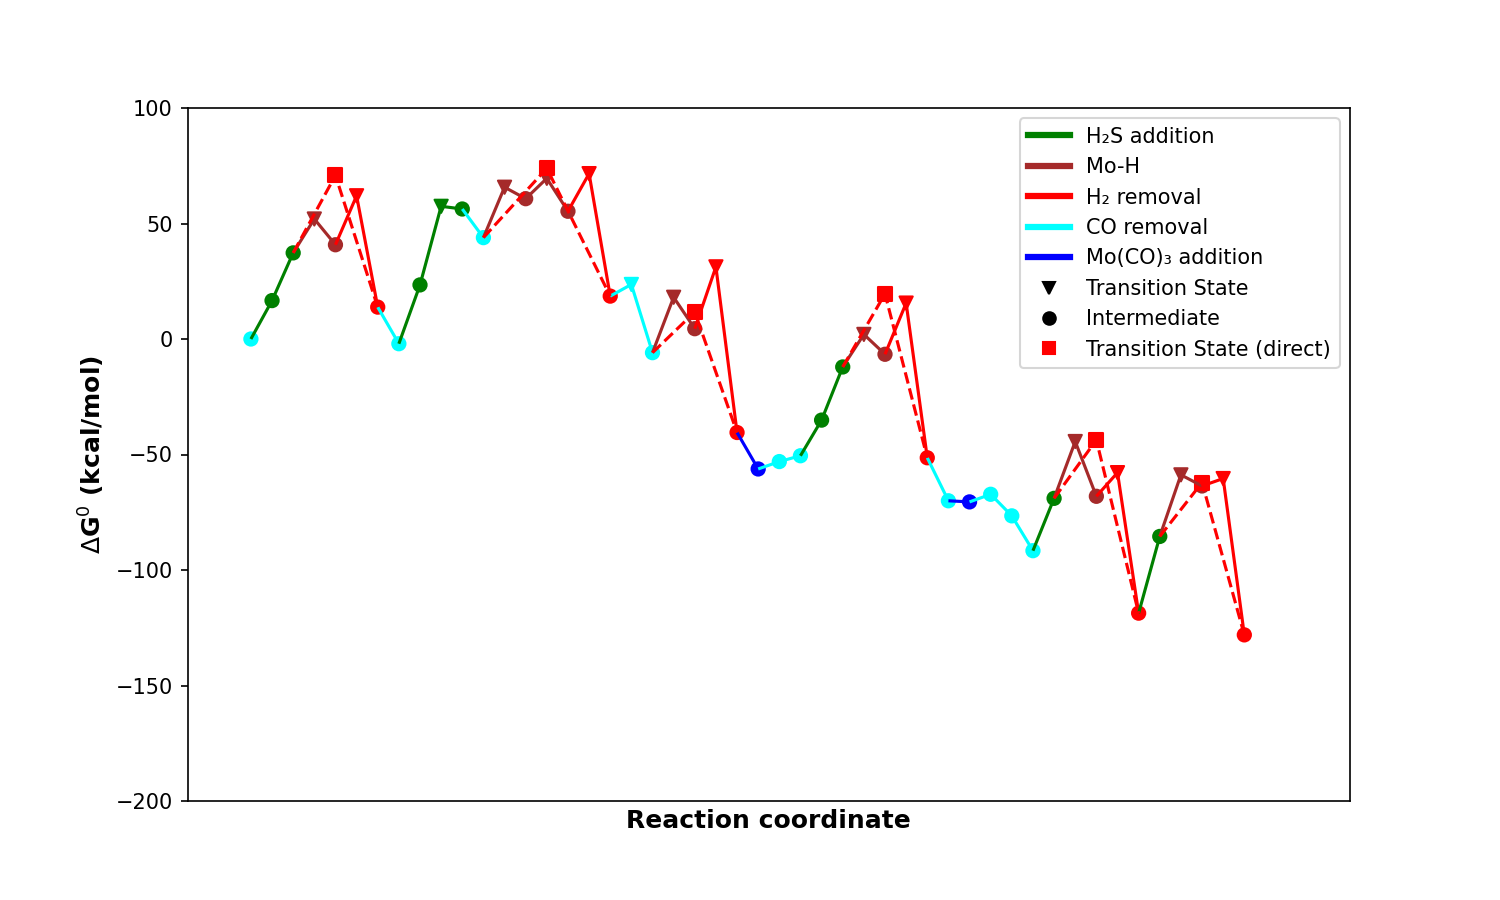

In [8]:
import matplotlib.pyplot as plt
plotting(5, 52, 'Mo1-Mo3_N', -200, 100) #please consider line 108 to 140 from "Plotting PES from the genrated dataset at 1023.15" section K

plt.savefig('/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/Mo1-Mo3_N.png', dpi=500)

79


<IPython.core.display.Javascript object>


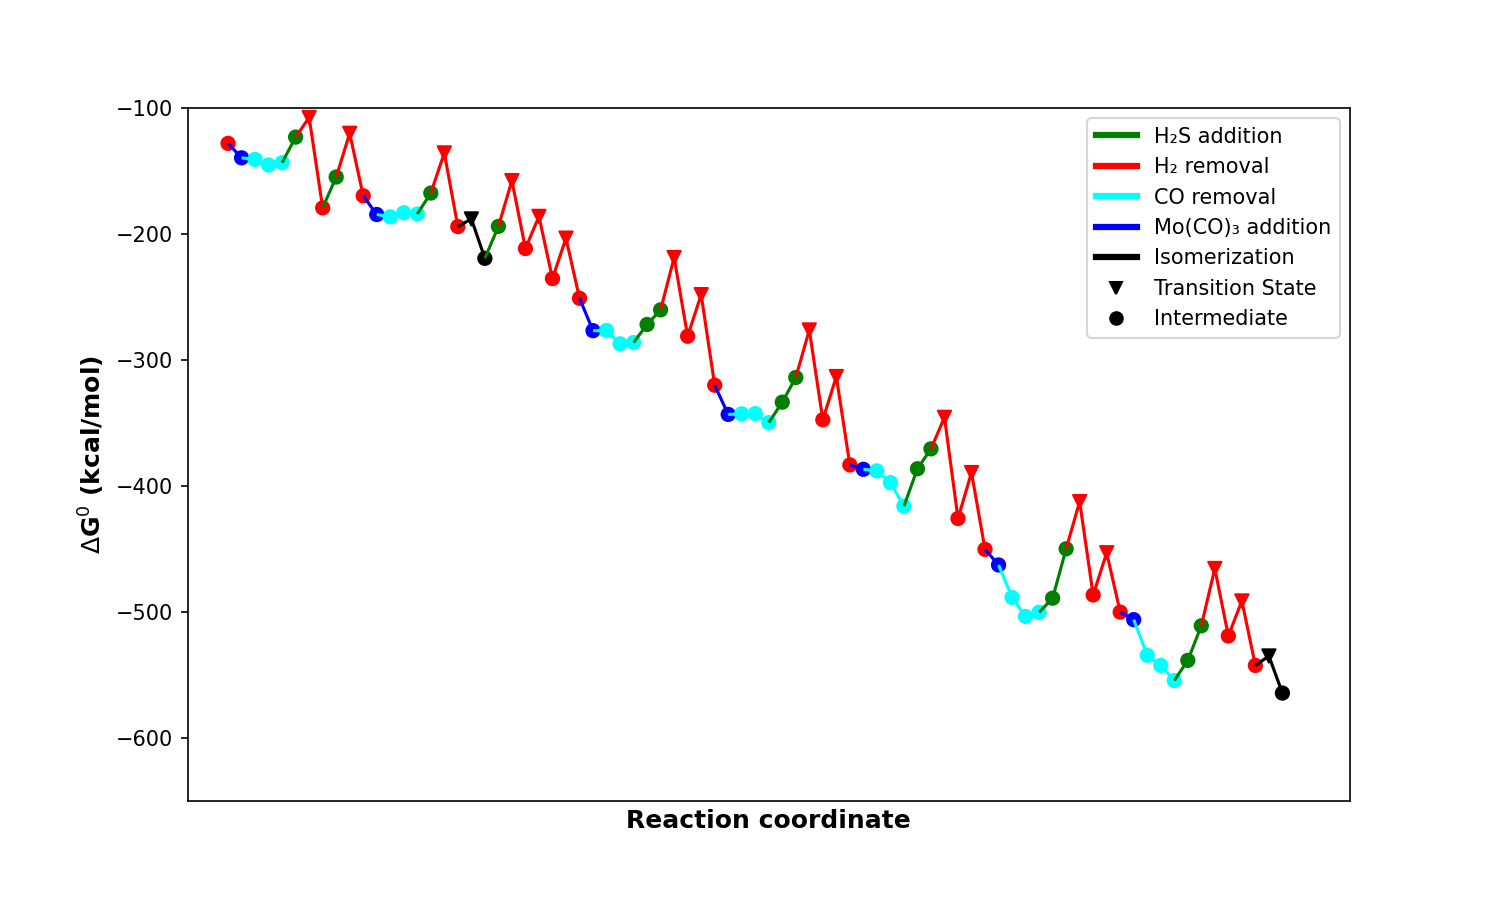

In [10]:
import matplotlib.pyplot as plt
plotting(52, 130, 'N2', -650, -100)
plt.savefig('/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/N2.png', dpi=500)

108


<IPython.core.display.Javascript object>


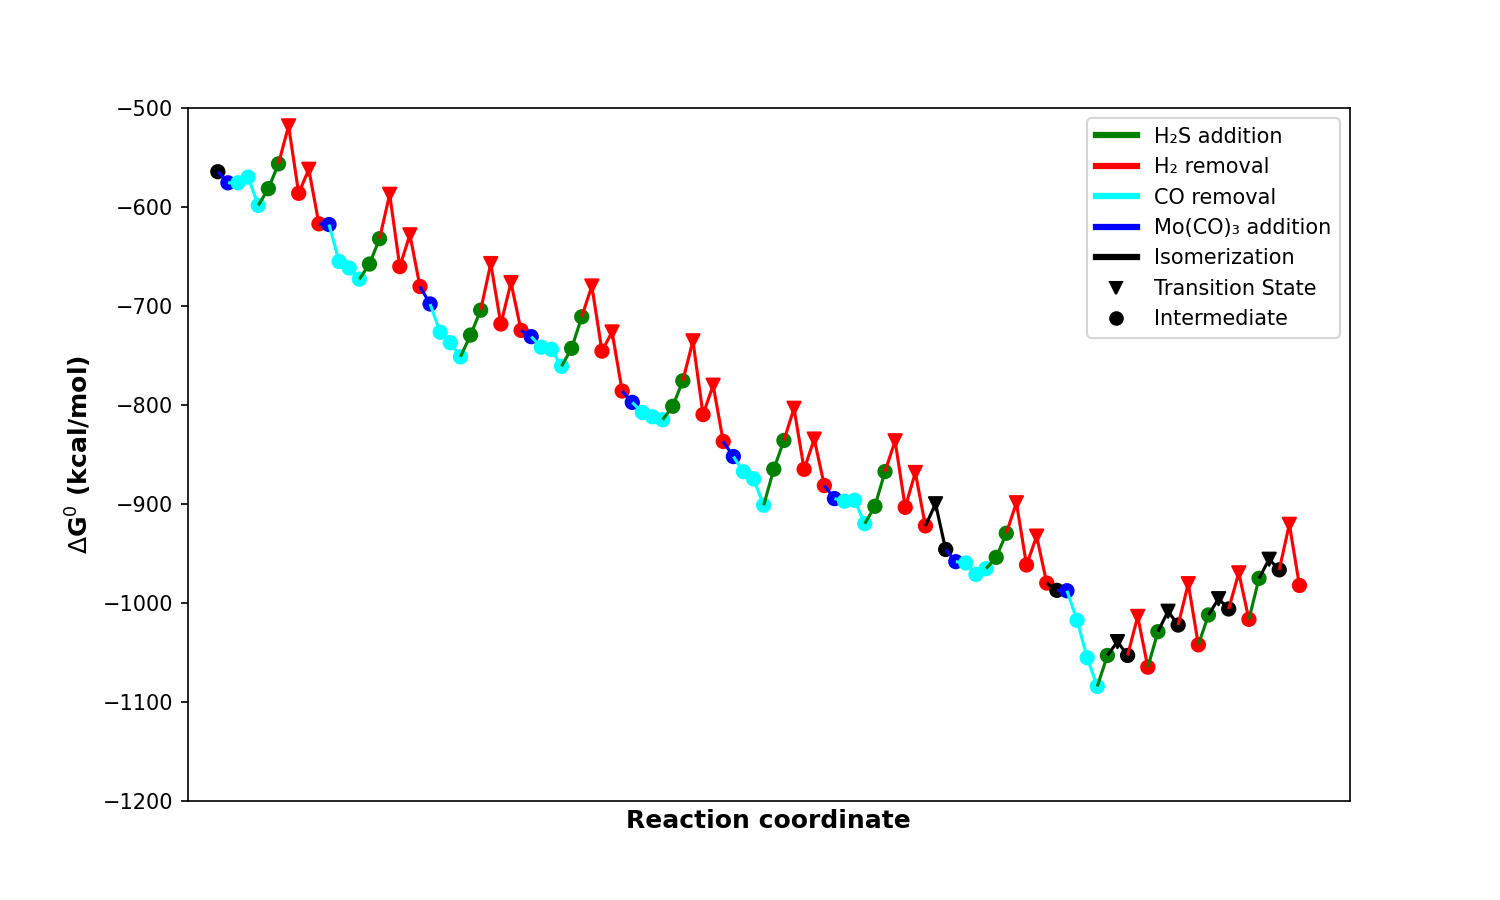

In [11]:
import matplotlib.pyplot as plt
plotting(130, 237, 'N3', -1200, -500)
plt.savefig('/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/N3.png', dpi=500)

35


<IPython.core.display.Javascript object>


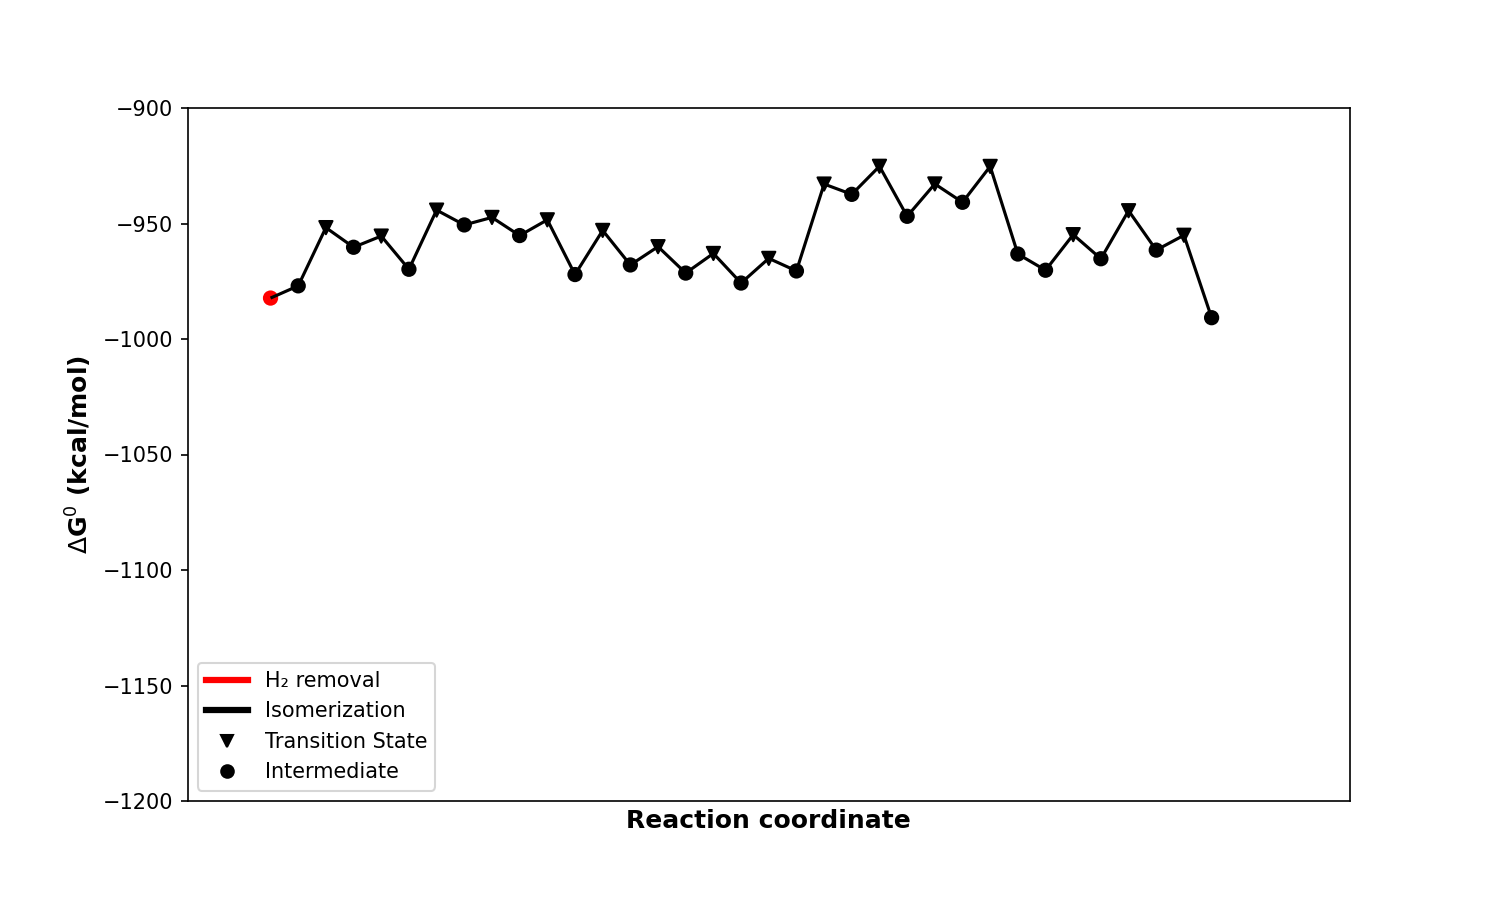

In [12]:
import matplotlib.pyplot as plt
plotting(237,  271, 'TH', -1200, -900)
plt.savefig('/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/TH.png', dpi=500)

# Comparing Mozz and Szz edge growth

In [13]:
import os
import numpy as np
def load_data_from_array(filename):
    return np.load(filename, allow_pickle=True)
def plotting(start_range, end_range, reaction_type, ener_init, ener_fin):
    T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]
    loaded_data = {}
    directory_name = reaction_type + '/'

    reaction_index = load_data_from_array(directory_name + "index_" + reaction_type + ".npy")
    TS_index = load_data_from_array(directory_name + "index_TS_" + reaction_type + ".npy")
    del_G = load_data_from_array(directory_name + "del_G_list_" + reaction_type + ".npy")

    color_test = ['green' if x in ['H2S', 'H2S_addn', 'H2S_addn_ts'] else
                  'cyan' if x in ['CO', 'CO_ts'] else
                  'red' if x in ['H2', 'H2_ts'] else
                  'blue' if x == 'MoCO3' else
                  'brown' if x in ['iso_agos', 'iso_agos_ts'] else
                  'black'
                  for x in reaction_index[0]]
    #print(len(color_test))
    TS_filtered = [index for index in TS_index[0] if index > start_range - 1 and index < end_range]
    TS_color = []
    TS_G_Data = [[] for _ in range(len(T_CVD))]
    INT_G_Data = [[] for _ in range(len(T_CVD))]
    INT_indices = []
    INT_color = []

    for i in TS_filtered:
        TS_color.append(color_test[i - (start_range - 1)])
    for i in range(start_range - 1, end_range):
        if i not in TS_filtered:
            INT_indices.append(i)
            INT_color.append(color_test[i - (start_range - 1)])
    for j in range(len(T_CVD)):
        for i in TS_filtered:
            TS_G_Data[j].append(del_G[j][i - (start_range - 1)])
        for i in range((start_range - 1), end_range):
            if i not in TS_index[j]:
                INT_G_Data[j].append(del_G[j][i - (start_range - 1)])

    return TS_filtered, TS_G_Data, INT_indices, INT_G_Data, TS_color, INT_color, del_G, color_test

%matplotlib notebook
import os
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

# Plotting function for Mozz and Szz
def plot_reactions(start_mozz, end_mozz, start_szz, end_szz, ener_init, ener_fin):
    # Plotting Mozz reaction
    mozz_data = plotting(start_mozz, end_mozz, 'Mozz', ener_init, ener_fin)
    TS_filtered_mozz, TS_G_Data_mozz, INT_indices_mozz, INT_G_Data_mozz, TS_color_mozz, INT_color_mozz, del_G_mozz, color_test_mozz = mozz_data

    G_data_mozz = np.array(del_G_mozz[0])
    x_rxn_mozz = np.linspace(start_mozz - 1, end_mozz - 1, end_mozz - start_mozz + 1)
    points_mozz = np.array([x_rxn_mozz, G_data_mozz]).T.reshape(-1, 1, 2)
    segments_mozz = np.concatenate([points_mozz[:-1], points_mozz[1:]], axis=1)
    lc_mozz = LineCollection(segments_mozz, colors=color_test_mozz[1:])
    lc_mozz.set_linewidth(1.5)
    lc_mozz.set_linestyle('--')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.add_collection(lc_mozz)
    ax.scatter(TS_filtered_mozz, TS_G_Data_mozz[0], c=TS_color_mozz, marker="v", s=40)
    ax.scatter(INT_indices_mozz, INT_G_Data_mozz[0], c=INT_color_mozz, marker="o", s=40)

    # Plotting Szz reaction
    szz_data = plotting(start_szz, end_szz, 'Szz', ener_init, ener_fin)
    
    TS_filtered_szz, TS_G_Data_szz, INT_indices_szz, INT_G_Data_szz, TS_color_szz, INT_color_szz, del_G_szz, color_test_szz = szz_data
    G_data_szz = np.array(del_G_szz[0])  # Modify this line to extract Szz data
    x_rxn_szz = np.linspace(start_szz - 1, end_szz - 1, end_szz - start_szz + 1)
    points_szz = np.array([x_rxn_szz, G_data_szz]).T.reshape(-1, 1, 2)
    segments_szz = np.concatenate([points_szz[:-1], points_szz[1:]], axis=1)
    lc_szz = LineCollection(segments_szz, colors=color_test_szz[1:])
    lc_szz.set_linewidth(1.5)
    lc_szz.set_linestyle(':')

    ax.add_collection(lc_szz)
    ax.scatter(TS_filtered_szz, TS_G_Data_szz[0], c=TS_color_szz, marker="v", s=40)
    ax.scatter(INT_indices_szz, INT_G_Data_szz[0], c=INT_color_szz, marker="o", s=40)

    ax.set_xlim(min(start_mozz, start_szz) - 5, max(end_mozz, end_szz) + 5)
    ax.set_ylim(ener_init, ener_fin)
    ax.set_ylabel(r'$\Delta$G$^0$ (kcal/mol)', fontsize=12, fontweight='bold')
    ax.set_xlabel("Reaction coordinate", fontsize=12, fontweight='bold')
    ax.tick_params(bottom=False, labelbottom=False)
    
    legend_labels_lines = []
    legend_handles_lines = []

    if 'green' in color_test_szz[:]:
        legend_labels_lines.append(u"H\u2082S addition")
        legend_handles_lines.append(Line2D([0], [0], color='green', lw=3))
    if 'brown' in color_test_szz[:]:
        legend_labels_lines.append("Mo-H")
        legend_handles_lines.append(Line2D([0], [0], color='brown', lw=3))
    if 'red' in color_test_szz[:]:
        legend_labels_lines.append(u"H\u2082 removal")
        legend_handles_lines.append(Line2D([0], [0], color='red', lw=3))
    if 'cyan' in color_test_szz[:]:
        legend_labels_lines.append("CO removal")
        legend_handles_lines.append(Line2D([0], [0], color='cyan', lw=3))
    if 'blue' in color_test_szz[:]:
        legend_labels_lines.append(u"Mo(CO)\u2083 addition")
        legend_handles_lines.append(Line2D([0], [0], color='blue', lw=3))
    if 'black' in color_test_szz[:]:
        legend_labels_lines.append("Isomerization")
        legend_handles_lines.append(Line2D([0], [0], color='black', lw=3))

    legend_labels_markers = ['Transition State', 'Intermediate']
    legend_handles_markers = [Line2D([0], [0], color='black', lw=0, marker='v'),
                              Line2D([0], [0], color='black', lw=0, marker='o')]

    plt.legend(legend_handles_lines + legend_handles_markers, legend_labels_lines + legend_labels_markers, loc='best')

    plt.show()

#plt.savefig("/data/sagar/CVD/Fig/Mozz-Szz_edge-growth.jpg", dpi=500)

<IPython.core.display.Javascript object>


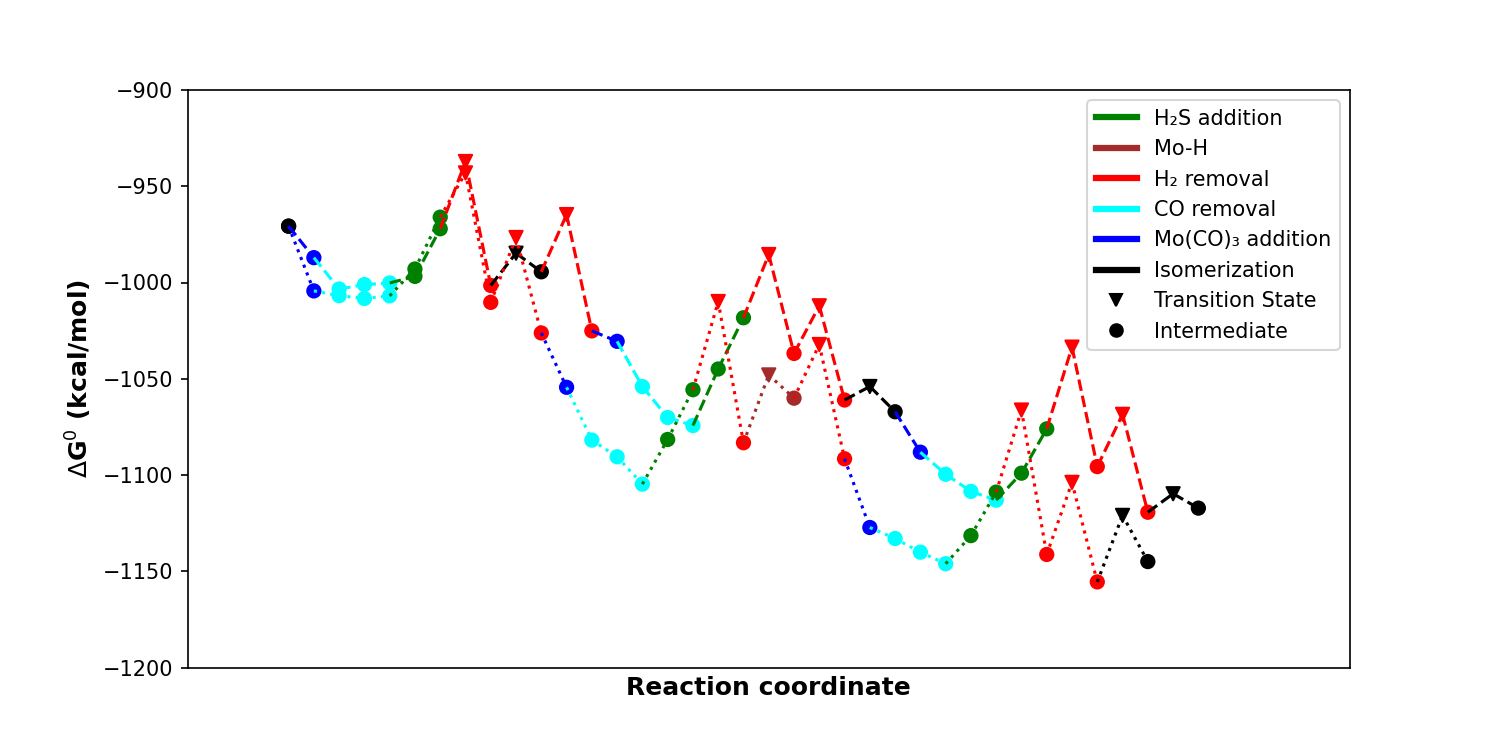

In [15]:
# Call the plot_reactions function
plot_reactions(300, 336, 300, 334, -1200, -900)
plt.savefig("/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/Mozz-Szz_edge-growth.jpg", dpi=500)

# Mo13-Mo15 hexagonal shape vs triangular shape

In [16]:
def plotting(start_range, end_range, reaction_type, ener_init, ener_fin):
    T_CVD = [1023.15, 1123.15, 1223.15, 1323.15]
    loaded_data = {}
    directory_name = reaction_type + '/'

    reaction_index = load_data_from_array(directory_name + "index_" + reaction_type + ".npy")
    TS_index = load_data_from_array(directory_name + "index_TS_" + reaction_type + ".npy")
    del_G = load_data_from_array(directory_name + "del_G_list_" + reaction_type + ".npy")

    color_test = ['green' if x in ['H2S', 'H2S_addn', 'H2S_addn_ts'] else
                  'cyan' if x in ['CO', 'CO_ts'] else
                  'red' if x in ['H2', 'H2_ts'] else
                  'blue' if x == 'MoCO3' else
                  'brown' if x in ['iso_agos', 'iso_agos_ts'] else
                  'black'
                  for x in reaction_index[0]]
    #print(len(color_test))
    TS_filtered = [index for index in TS_index[0] if index > start_range - 1 and index < end_range]
    TS_color = []
    TS_G_Data = [[] for _ in range(len(T_CVD))]
    INT_G_Data = [[] for _ in range(len(T_CVD))]
    INT_indices = []
    INT_color = []

    for i in TS_filtered:
        TS_color.append(color_test[i - (start_range - 1)])
    for i in range(start_range - 1, end_range):
        if i not in TS_filtered:
            INT_indices.append(i)
            INT_color.append(color_test[i - (start_range - 1)])
    for j in range(len(T_CVD)):
        for i in TS_filtered:
            TS_G_Data[j].append(del_G[j][i - (start_range - 1)])
        for i in range((start_range - 1), end_range):
            if i not in TS_index[j]:
                INT_G_Data[j].append(del_G[j][i - (start_range - 1)])

    return TS_filtered, TS_G_Data, INT_indices, INT_G_Data, TS_color, INT_color, del_G, color_test

%matplotlib notebook
import os
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

# Plotting function for Mozz and Szz
def plot_reactions(start_mozz, end_mozz, start_szz, end_szz, ener_init, ener_fin):
    # Plotting Mozz reaction
    mozz_data = plotting(start_mozz, end_mozz, 'Mo13-15', ener_init, ener_fin)
    TS_filtered_mozz, TS_G_Data_mozz, INT_indices_mozz, INT_G_Data_mozz, TS_color_mozz, INT_color_mozz, del_G_mozz, color_test_mozz = mozz_data

    G_data_mozz = np.array(del_G_mozz[0])
    x_rxn_mozz = np.linspace(start_mozz - 1, end_mozz - 1, end_mozz - start_mozz + 1)
    points_mozz = np.array([x_rxn_mozz, G_data_mozz]).T.reshape(-1, 1, 2)
    segments_mozz = np.concatenate([points_mozz[:-1], points_mozz[1:]], axis=1)
    lc_mozz = LineCollection(segments_mozz, colors=color_test_mozz[1:])
    lc_mozz.set_linewidth(1.5)
    lc_mozz.set_linestyle('--')

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.add_collection(lc_mozz)
    ax.scatter(TS_filtered_mozz, TS_G_Data_mozz[0], c=TS_color_mozz, marker="v", s=40)
    ax.scatter(INT_indices_mozz, INT_G_Data_mozz[0], c=INT_color_mozz, marker="o", s=40)

    # Plotting Szz reaction
    szz_data = plotting(start_szz, end_szz, 'Mo13-15-t', ener_init, ener_fin)
    
    TS_filtered_szz, TS_G_Data_szz, INT_indices_szz, INT_G_Data_szz, TS_color_szz, INT_color_szz, del_G_szz, color_test_szz = szz_data
    G_data_szz = np.array(del_G_szz[0])  # Modify this line to extract Szz data
    x_rxn_szz = np.linspace(start_szz - 1, end_szz - 1, end_szz - start_szz + 1)
    points_szz = np.array([x_rxn_szz, G_data_szz]).T.reshape(-1, 1, 2)
    segments_szz = np.concatenate([points_szz[:-1], points_szz[1:]], axis=1)
    lc_szz = LineCollection(segments_szz, colors=color_test_szz[1:])
    lc_szz.set_linewidth(1.5)
    lc_szz.set_linestyle(':')

    ax.add_collection(lc_szz)
    ax.scatter(TS_filtered_szz, TS_G_Data_szz[0], c=TS_color_szz, marker="v", s=40)
    ax.scatter(INT_indices_szz, INT_G_Data_szz[0], c=INT_color_szz, marker="o", s=40)

    ax.set_xlim(min(start_mozz, start_szz) - 2, max(end_mozz, end_szz) + 2)
    ax.set_ylim(ener_init, ener_fin)
    ax.set_ylabel(r'$\Delta$G$^0$ (kcal/mol)', fontsize=12, fontweight='bold')
    ax.set_xlabel("Reaction coordinate", fontsize=12, fontweight='bold')
    ax.tick_params(bottom=False, labelbottom=False)
    
    legend_labels_lines = []
    legend_handles_lines = []

    if 'green' in color_test_szz[:]:
        legend_labels_lines.append(u"H\u2082S addition")
        legend_handles_lines.append(Line2D([0], [0], color='green', lw=3))
    if 'brown' in color_test_szz[:]:
        legend_labels_lines.append("Mo-H")
        legend_handles_lines.append(Line2D([0], [0], color='brown', lw=3))
    if 'red' in color_test_szz[:]:
        legend_labels_lines.append(u"H\u2082 removal")
        legend_handles_lines.append(Line2D([0], [0], color='red', lw=3))
    if 'cyan' in color_test_szz[:]:
        legend_labels_lines.append("CO removal")
        legend_handles_lines.append(Line2D([0], [0], color='cyan', lw=3))
    if 'blue' in color_test_szz[:]:
        legend_labels_lines.append(u"Mo(CO)\u2083 addition")
        legend_handles_lines.append(Line2D([0], [0], color='blue', lw=3))
    if 'black' in color_test_szz[:]:
        legend_labels_lines.append("Isomerization")
        legend_handles_lines.append(Line2D([0], [0], color='black', lw=3))

    legend_labels_markers = ['Transition State', 'Intermediate']
    legend_handles_markers = [Line2D([0], [0], color='black', lw=0, marker='v'),
                              Line2D([0], [0], color='black', lw=0, marker='o')]

    plt.legend(legend_handles_lines + legend_handles_markers, legend_labels_lines + legend_labels_markers, loc='best')

    plt.show()


<IPython.core.display.Javascript object>


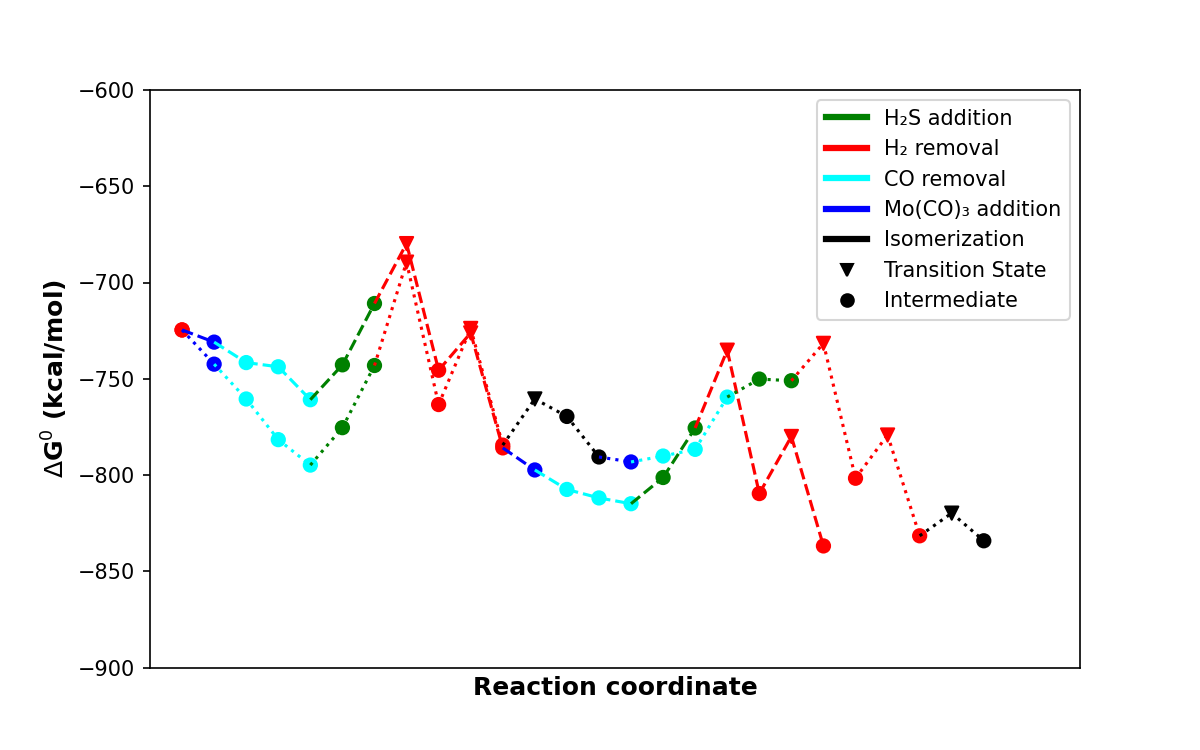

In [17]:
plot_reactions(160, 180, 160, 185, -900, -600)
plt.savefig("/home/chesagar/CVD_sagar/reacion_plotting/CVD-manuscript_data/Fig/Mo13-15_hex-tri.jpg", dpi=500)

# t_Szz/t_Mozz (ratio of time for Szz-edge growth and Mozz-edge growth)

In [18]:
import math
import numpy as np

R = 1.98709e-3  # Gas constant in kcal/mol-K
kb = 1.380658e-23  # Boltzmann constant in J K-1
h = 6.6260755e-34  # Planck constant in J
T = 1050 + 273.15  # Temperature in K
pre_exp = kb * T / h  # Pre-exponential factor

n_MoCO6 = (0.94 * 1e-5) / 264.026  # molar flow rate (density*sccm)/mass
n_H2S = (1.36 * 10) / 34.1
n_H2 = (0.0899 * 1000) / 2.016
n_CO = (1.14 * 1000) / 28.01

p_MoCO6 = (n_MoCO6 / (n_MoCO6 + n_H2S + n_H2 + n_CO)) * (600 / 760) * 1.01325
p_H2S = (n_H2S / (n_MoCO6 + n_H2S + n_H2 + n_CO)) * (600 / 760) * 1.01325
p_H2 = (n_H2 / (n_MoCO6 + n_H2S + n_H2 + n_CO)) * (600 / 760) * 1.01325
p_CO = (n_CO / (n_MoCO6 + n_H2S + n_H2 + n_CO)) * (600 / 760) * 1.01325


def ln(x):
    return math.log(x)


def calculate_time(reaction_type):
    directory_name = reaction_type + '/'
    del_G_barrier = load_data_from_array(directory_name + "del_G_barrier_" + reaction_type + ".npy")
    del_G_barrier_back = load_data_from_array(directory_name + "del_G_barrier_back_" + reaction_type + ".npy")
    nu_MoCO3 = load_data_from_array(directory_name + "nu_MoCO3_" + reaction_type + ".npy")
    nu_H2S = load_data_from_array(directory_name + "nu_H2S_" + reaction_type + ".npy")
    nu_H2 = load_data_from_array(directory_name + "nu_H2_" + reaction_type + ".npy")
    nu_CO = load_data_from_array(directory_name + "nu_CO_" + reaction_type + ".npy")

    num_runs = 10000
    time = []
    for i in range(num_runs):
        n = 1
        t = 0
        while n <= len(del_G_barrier[0]):
            Ea_f = del_G_barrier[2][n - 1]
            a_f = -Ea_f / (R * T)
            nu_H2S_val = nu_H2S[0][n - 1]
            nu_MoCO3_val = nu_MoCO3[0][n - 1]
            nu_H2_val = nu_H2[0][n - 1]
            nu_CO_val = nu_CO[0][n - 1]

            r_f = pre_exp * (p_H2S ** nu_H2S_val) * (p_MoCO6 ** nu_MoCO3_val) * (p_H2 ** nu_H2_val) * (
                    p_CO ** nu_CO_val) * math.exp(a_f)

            Ea_b = del_G_barrier_back[2][n - 1]
            a_b = -Ea_b / (R * T)

            r_b = pre_exp * (p_H2S ** nu_H2S_val) * (p_MoCO6 ** nu_MoCO3_val) * (p_H2 ** nu_H2_val) * (
                    p_CO ** nu_CO_val) * math.exp(a_b)

            u1 = np.random.random()
            u2 = np.random.random()

            n += 1

            t += ln(1 / u2) * (1 / (r_f + r_b))
        time.append(t)
    return np.average(time)


reaction_types = ['Szz', 'Mozz']
roots = []

for reaction_type in reaction_types:
    average_time = calculate_time(reaction_type)
    roots.append(average_time)

time_ratio = roots[0] / roots[1]
print("t_Szz/t_Mozz:", time_ratio)


t_Szz/t_Mozz: 1.2098169131824754


# Reactions, del_G_rxn and del_G_barrier in dataframe format for SI

In [21]:
reaction_type = 'Szz'
loaded_data = {}
directory_name = reaction_type + '/'

reaction_indexes = load_data_from_array(directory_name + "index_rxn_" + reaction_type + ".npy")
reactions = load_data_from_array(directory_name + "rxn_" + reaction_type + ".npy")
del_G_reactions = load_data_from_array(directory_name + "del_G_rxn_" + reaction_type + ".npy")
del_G_barrier = load_data_from_array(directory_name + "del_G_barrier_" + reaction_type + ".npy")

# print(len(reaction_indexes[0]))
# print(len(reactions[0]))
# print(len(del_G_reactions[0]))
# print(len(del_G_barrier[0]))

df = pd.DataFrame({'Reaction Indexes': reaction_indexes[0], 'Reactions': reactions[0], 'del_G_reactions': 
                   del_G_reactions[0], 'del_G_barrier': del_G_barrier[0]})

file = open('Mo19-Mo22_Szz.csv', 'wb')

df.to_csv(file)


#print(df)

# Merging all optimized xyz coordinate with Molecular formula for SI

In [6]:
import cclib
from cclib.io import ccopen

def merge_xyz_coord(initial, start_range, end_range, output_file):
    with open(output_file, "w") as outfile:
        for i in range(start_range, end_range + 1):
            final = ".log"
            file_name = initial + str(i) + final
            print(file_name)
            parser = cclib.io.ccopen(file_name)
            data = parser.parse()
            atoms_list = data.atomnos
            coord = data.atomcoords
            coords = coord[-1]
            vib_freqs = data.vibfreqs
            # vib_freqs_list.append(vib_freqs)
            A = [str(x) for x in atoms_list]
            count_Mo_new = A.count("42")
            count_S_new = A.count("16")
            count_H_new = A.count("1")
            count_C_new = A.count("6")
            total_no_atoms = count_Mo_new + count_S_new + 2 * count_C_new + count_H_new
            Mol_formula_f = (
                "Mo"
                + f"{A.count('42')}"
                + "S"
                + f"{A.count('16')}"
                + "H"
                + f"{A.count('1')}"
                + "C"
                + f"{A.count('6')}"
                + "O"
                + f"{A.count('8')}"
            )

            if vib_freqs[0] < 0:
                filename = str(i) + "_ts_" + Mol_formula_f
            else:
                filename = str(i) + "_" + Mol_formula_f

            def extract_xyz_coordinates(file_name):
                coordinates = []
                last_input_orientation_line = None
                with open(file_name, "r") as file:
                    lines = file.readlines()
                    # Search for the lines containing "Input orientation:"
                    for j, line in enumerate(lines):
                        if "Input orientation:" in line:
                            last_input_orientation_line = j
                    # Extract the desired columns from lines after the last occurrence of "Input orientation:"
                    if last_input_orientation_line is not None:
                        relevant_lines = lines[
                            last_input_orientation_line : last_input_orientation_line
                            + (total_no_atoms + 5)
                        ]
                        # Extract the desired columns using string manipulation
                        for line in relevant_lines[-total_no_atoms:]:
                            columns = line.split()
                            atom = columns[1]
                            x = float(columns[3])
                            y = float(columns[4])
                            z = float(columns[5])
                            coordinates.append((atom, x, y, z))
                return coordinates

            xyz_coordinates = extract_xyz_coordinates(file_name)

            if xyz_coordinates:
                outfile.write(f"{total_no_atoms}\n")
                outfile.write(f"{filename}\n")
                for atom, x, y, z in xyz_coordinates:
                    outfile.write(f"{atom} {x} {y} {z}\n")
                outfile.write("\n")  # Add line gap between coordinates
                print(f"XYZ coordinates for {filename} saved.")
            else:
                print(f"No optimized coordinates found for {filename}.")

    print(f"All XYZ coordinates saved to {output_file}")


In [20]:
initial = "Mo19-Mo22_Mozz/"
output_file = 'Mo19-Mo22_Mozz.xyz'
start_range = 300
end_range = 335
merge_xyz_coord(initial, start_range, end_range, output_file)

Mo19-Mo22_Mozz/300.log
XYZ coordinates for 300_Mo20S45H0C3O3 saved.
Mo19-Mo22_Mozz/301.log
XYZ coordinates for 301_Mo20S45H0C2O2 saved.
Mo19-Mo22_Mozz/302.log
XYZ coordinates for 302_Mo20S45H0C1O1 saved.
Mo19-Mo22_Mozz/303.log
XYZ coordinates for 303_Mo20S45H0C0O0 saved.
Mo19-Mo22_Mozz/304.log
XYZ coordinates for 304_Mo20S46H2C0O0 saved.
Mo19-Mo22_Mozz/305.log
XYZ coordinates for 305_Mo20S47H4C0O0 saved.
Mo19-Mo22_Mozz/306.log
XYZ coordinates for 306_ts_Mo20S47H4C0O0 saved.
Mo19-Mo22_Mozz/307.log
XYZ coordinates for 307_Mo20S47H2C0O0 saved.
Mo19-Mo22_Mozz/308.log
XYZ coordinates for 308_ts_Mo20S47H2C0O0 saved.
Mo19-Mo22_Mozz/309.log
XYZ coordinates for 309_Mo20S47H2C0O0 saved.
Mo19-Mo22_Mozz/310.log
XYZ coordinates for 310_ts_Mo20S47H2C0O0 saved.
Mo19-Mo22_Mozz/311.log
XYZ coordinates for 311_Mo20S47H0C0O0 saved.
Mo19-Mo22_Mozz/312.log
XYZ coordinates for 312_Mo21S47H0C3O3 saved.
Mo19-Mo22_Mozz/313.log
XYZ coordinates for 313_Mo21S47H0C2O2 saved.
Mo19-Mo22_Mozz/314.log
XYZ coordinates 